# Milestone 1: Dataset exploration

## Requirements

In [67]:
%%capture
!pip install -q kagglehub

In [68]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import textwrap
print("imports done!")

imports done!


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Download datasets

In [69]:
# Global Happiness Scores and Factors Dataset
gh_path = kagglehub.dataset_download("sazidthe1/global-happiness-scores-and-factors")
print("Path to global happiness dataset files:", gh_path)

# Mental Health Dataset
mh_path = kagglehub.dataset_download("programmerrdai/mental-health-dataset")
print("Path to mental health dataset files:", mh_path)

# Quality of Life Index Dataset
qol_path = kagglehub.dataset_download("marcelobatalhah/quality-of-life-index-by-country")
print("Path to quality of life dataset files:", qol_path)

# HDI
hdi_path = "csv/HDIdataset.csv"
print("Path to HDI dataset file:", hdi_path)

# ---

# csv files in gh_path:
gh_files = glob.glob(gh_path + "/*.csv")
print("\n \033[1m>>> Global Happiness Dataset Files:\033[0m")
for file in gh_files:
    print(os.path.basename(file))

# csv files in mh_path:
mh_files = glob.glob(mh_path + "/*.csv")
print("\n \033[1m>>> Mental Health Dataset Files:\033[0m")
for file in mh_files:
    print(os.path.basename(file))
    
# csv files in qol_path:
qol_files = glob.glob(qol_path + "/*.csv")
print("\n \033[1m>>> Quality of Life Dataset Files:\033[0m")
for file in qol_files:
    print(os.path.basename(file))


Path to global happiness dataset files: /Users/andreamiele/.cache/kagglehub/datasets/sazidthe1/global-happiness-scores-and-factors/versions/1
Path to mental health dataset files: /Users/andreamiele/.cache/kagglehub/datasets/programmerrdai/mental-health-dataset/versions/1
Path to quality of life dataset files: /Users/andreamiele/.cache/kagglehub/datasets/marcelobatalhah/quality-of-life-index-by-country/versions/2
Path to HDI dataset file: csv/HDIdataset.csv

 >>> Global Happiness Dataset Files:
WHR_2015.csv
WHR_2016.csv
WHR_2017.csv
WHR_2019.csv
WHR_2018.csv
WHR_2020.csv
WHR_2021.csv
WHR_2023.csv
WHR_2022.csv

 >>> Mental Health Dataset Files:
prevalence-by-mental-and-substance-use-disorder.csv
share-with-mental-and-substance-disorders.csv
prevalence-of-depression-males-vs-females.csv
mental-and-substance-use-as-share-of-disease.csv
share-with-depression.csv
share-with-mental-or-substance-disorders-by-sex.csv

 >>> Quality of Life Dataset Files:
quality_of_life_indices_by_country.csv


## Check datasets

### Global happiness

In [12]:
# merge csv files in global happiness dataset
gh_files = glob.glob(os.path.join(gh_path, "WHR_*.csv"))
global_happiness_dfs = []
for file in gh_files:
    df = pd.read_csv(file)
    year = int(os.path.basename(file).split("WHR_")[1].split(".csv")[0])
    df["Year"] = year
    global_happiness_dfs.append(df)

global_happiness_df = pd.concat(global_happiness_dfs, ignore_index=True)
print("\n=== Global Happiness Dataset Combined ===")
print(global_happiness_df.info())
print(global_happiness_df.describe())
print("Missing Values in Global Happiness Dataset:\n", global_happiness_df.isnull().sum())


=== Global Happiness Dataset Combined ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1366 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1366 non-null   float64
 9   Year                          1367 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 106.9+ KB
None
       happiness_score  gdp_per_capita  social_support  \
count      1367

### Mental Health

In [ ]:
mh_files = glob.glob(os.path.join(mh_path, "*.csv"))
for file in mh_files:
    print(f"\n--- Analyzing Mental Health File: {os.path.basename(file)} ---")
    df = pd.read_csv(file)
    print(df.info())
    print(df.describe())
    print("Missing Values:\n", df.isnull().sum())


--- Analyzing Mental Health File: prevalence-by-mental-and-substance-use-disorder.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Entity                                                                            6840 non-null   object 
 1   Code                                                                              6150 non-null   object 
 2   Year                                                                              6840 non-null   int64  
 3   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)          6840 non-null   float64
 4   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)       6840 non-null   float64
 5   Prevalence - Eating 

### Quality of life

In [28]:
qol_file = os.path.join(qol_path, "quality_of_life_indices_by_country.csv")
qol_df = pd.read_csv(qol_file)
print("\n=== Quality of Life Index Dataset ===")
print(qol_df.info())
print(qol_df.describe())
print("Missing Values in Quality of Life Dataset:\n", qol_df.isnull().sum())


=== Quality of Life Index Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1495 non-null   int64  
 1   Country                         1495 non-null   object 
 2   Quality of Life Index           1495 non-null   float64
 3   Purchasing Power Index          1495 non-null   float64
 4   Safety Index                    1495 non-null   float64
 5   Health Care Index               1495 non-null   float64
 6   Cost of Living Index            1495 non-null   float64
 7   Property Price to Income Ratio  1495 non-null   float64
 8   Traffic Commute Time Index      1495 non-null   float64
 9   Pollution Index                 1495 non-null   float64
 10  Climate Index                   1495 non-null   object 
 11  Year                            1495 non-null   object 


### HDI 

In [70]:
hdi_df = pd.read_csv(hdi_path)
print("\n=== Human Development Index Dataset ===")
print(hdi_df.info())
print(hdi_df.describe())


=== Human Development Index Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6369 entries, 0 to 6368
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   iso3               6369 non-null   object 
 1   country            6369 non-null   object 
 2   hdicode            6369 non-null   object 
 3   region             6303 non-null   object 
 4   Year               6369 non-null   int64  
 5   abr                6369 non-null   float64
 6   co2_prod           6317 non-null   float64
 7   coef_ineq          1963 non-null   float64
 8   diff_hdi_phdi      4738 non-null   float64
 9   eys                6154 non-null   float64
 10  eys_f              5884 non-null   float64
 11  eys_m              5884 non-null   float64
 12  gdi                4710 non-null   float64
 13  gdi_group          182 non-null    float64
 14  gii                4405 non-null   float64
 15  gii_rank           166 non-null

# Global Happiness Scores and Factors

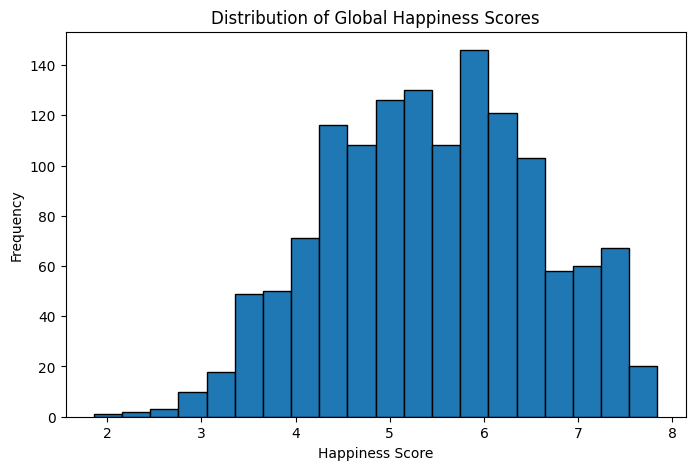

<Figure size 640x480 with 0 Axes>

In [38]:
plt.figure(figsize=(8, 5))
plt.hist(global_happiness_df["happiness_score"].dropna(), bins=20, edgecolor="black")
plt.title("Distribution of Global Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()
plt.savefig("figures/happiness_score_distribution.png")

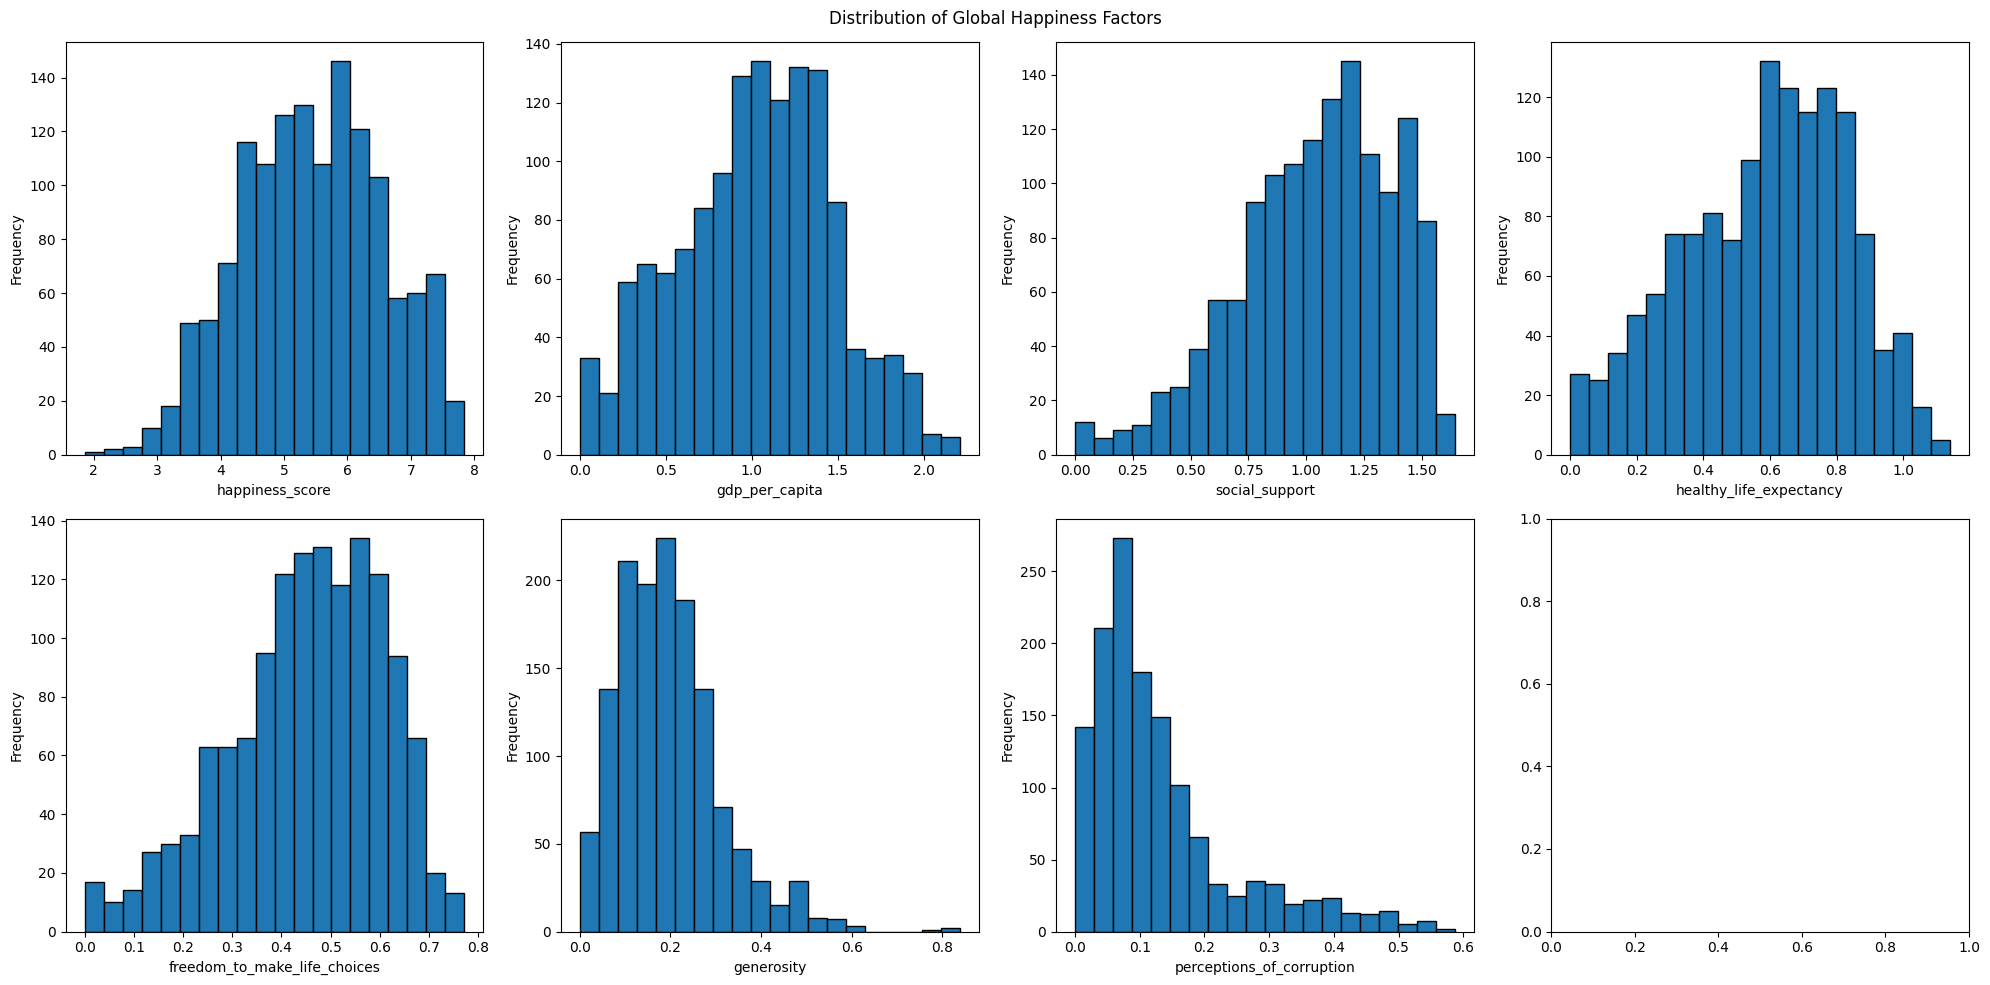

<Figure size 640x480 with 0 Axes>

In [39]:
numeric_columns = [
    "happiness_score", "gdp_per_capita", "social_support", "healthy_life_expectancy",
    "freedom_to_make_life_choices", "generosity", "perceptions_of_corruption", "Year"
]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()
fig.suptitle("Distribution of Global Happiness Factors")
for i, col in enumerate(numeric_columns):
    if col!="Year":
        axes[i].hist(global_happiness_df[col].dropna(), bins=20, edgecolor='black')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")
plt.tight_layout()
plt.show()
plt.savefig("figures/happiness_factors_distribution.png")

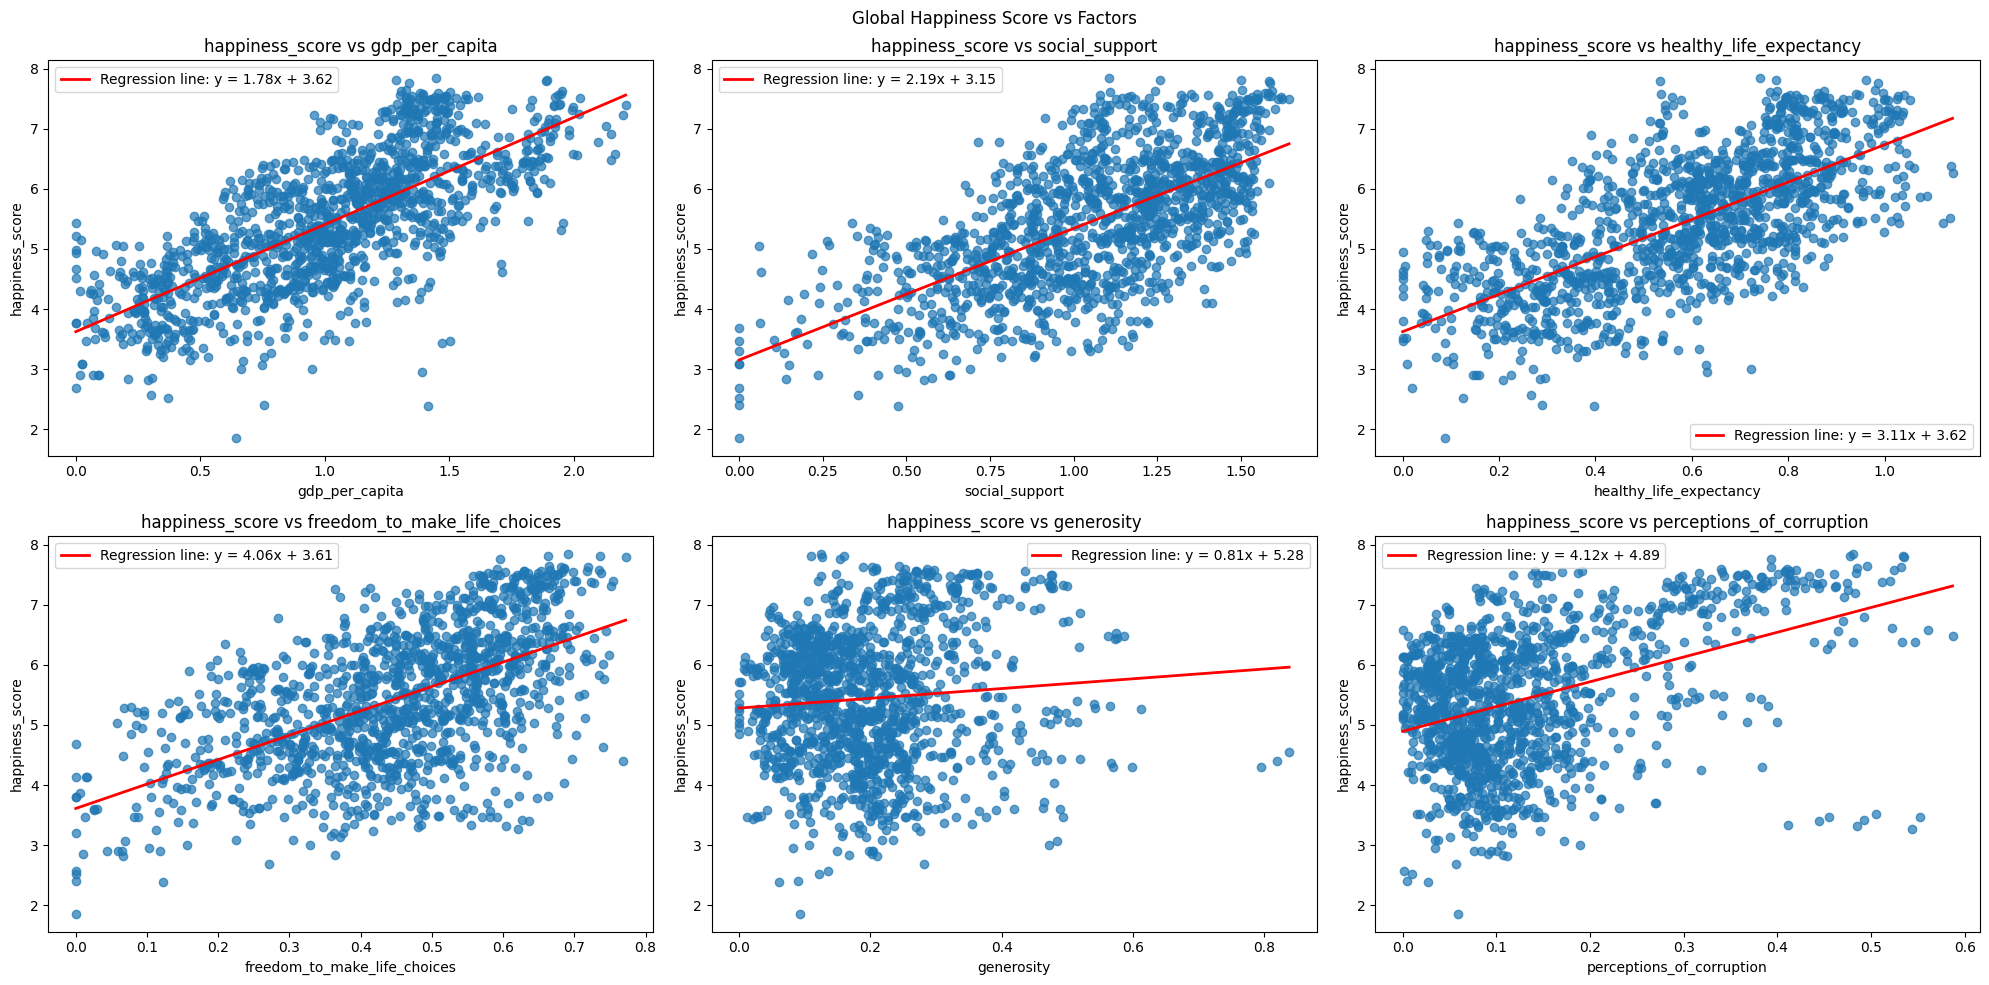

<Figure size 640x480 with 0 Axes>

In [40]:
factors = [
    "gdp_per_capita", "social_support", "healthy_life_expectancy",
    "freedom_to_make_life_choices", "generosity", "perceptions_of_corruption"
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()
fig.suptitle("Global Happiness Score vs Factors")
for i, factor in enumerate(factors):
    x = global_happiness_df[factor]
    y = global_happiness_df["happiness_score"]
    mask = x.notna() & y.notna()
    x_clean = x[mask]
    y_clean = y[mask]
    
    axes[i].scatter(x_clean, y_clean, alpha=0.7)
    
    # Compute regression line
    m, b = np.polyfit(x_clean, y_clean, 1)
    x_vals = np.linspace(x_clean.min(), x_clean.max(), 100)
    y_vals = m * x_vals + b
    axes[i].plot(x_vals, y_vals, color='red', lw=2, label=f'Regression line: y = {m:.2f}x + {b:.2f}')
    
    axes[i].set_xlabel(factor)
    axes[i].set_ylabel("happiness_score")
    axes[i].set_title(f"happiness_score vs {factor}")
    axes[i].legend()

plt.tight_layout()
plt.show()
plt.savefig("figures/happiness_score_vs_factors.png")

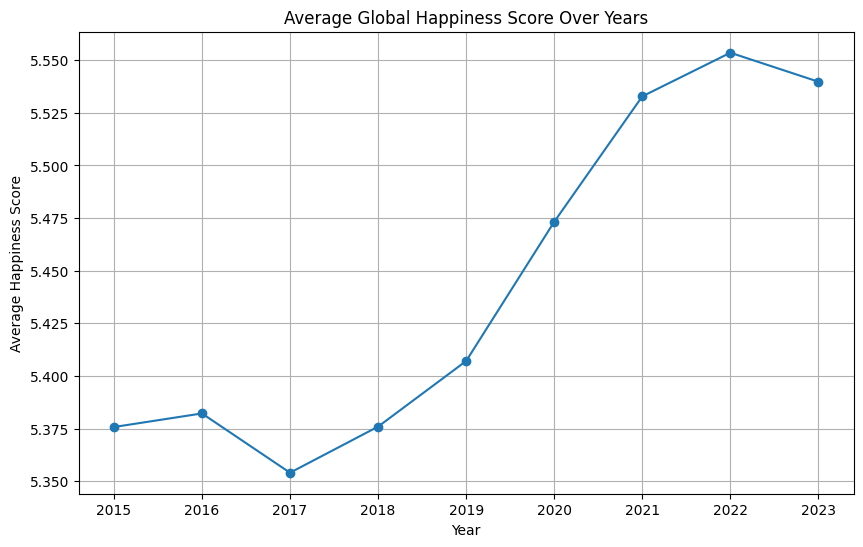

<Figure size 640x480 with 0 Axes>

In [41]:
plt.figure(figsize=(10, 6))
gh_by_year = global_happiness_df.groupby("Year")["happiness_score"].mean()
plt.plot(gh_by_year.index, gh_by_year.values, marker="o")
plt.title("Average Global Happiness Score Over Years")
plt.xlabel("Year")
plt.ylabel("Average Happiness Score")
plt.grid(True)
plt.show()
plt.savefig("figures/average_happiness_score_over_years.png")

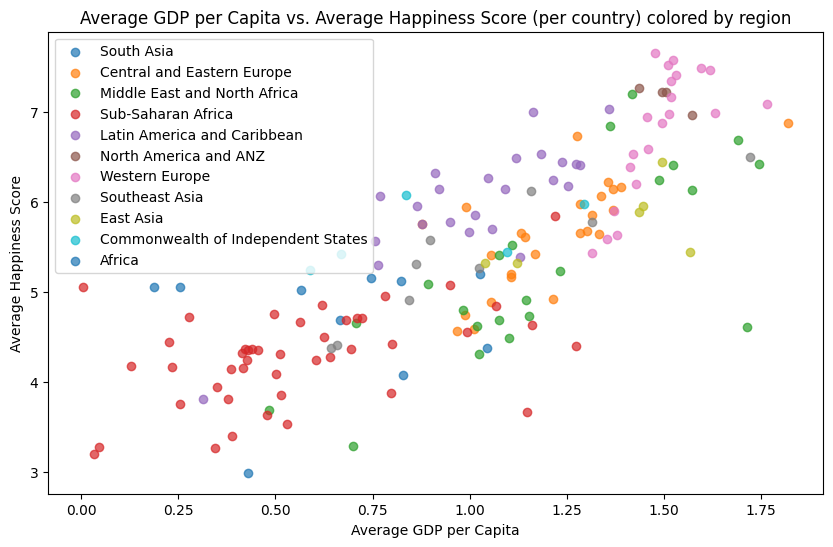

<Figure size 640x480 with 0 Axes>

In [42]:
per_country = global_happiness_df.groupby("country").agg({
    "happiness_score": "mean",
    "gdp_per_capita": "mean",
    "social_support": "mean",
    "healthy_life_expectancy": "mean",
    "freedom_to_make_life_choices": "mean",
    "generosity": "mean",
    "perceptions_of_corruption": "mean"
}).reset_index()

country_region = global_happiness_df.groupby("country")["region"].first().reset_index()
per_country = per_country.merge(country_region, on="country", how="left")

unique_regions = per_country["region"].unique()
colors = plt.cm.tab10.colors
color_dict = {region: colors[i % len(colors)] for i, region in enumerate(unique_regions)}

plt.figure(figsize=(10,6))
for region in unique_regions:
    sub = per_country[per_country["region"] == region]
    plt.scatter(sub["gdp_per_capita"], sub["happiness_score"], color=color_dict[region],
                label=region, alpha=0.7)
plt.title("Average GDP per Capita vs. Average Happiness Score (per country) colored by region")
plt.xlabel("Average GDP per Capita")
plt.ylabel("Average Happiness Score")
plt.legend()
plt.show()
plt.savefig("figures/gdp_per_capita_vs_happiness_score.png")

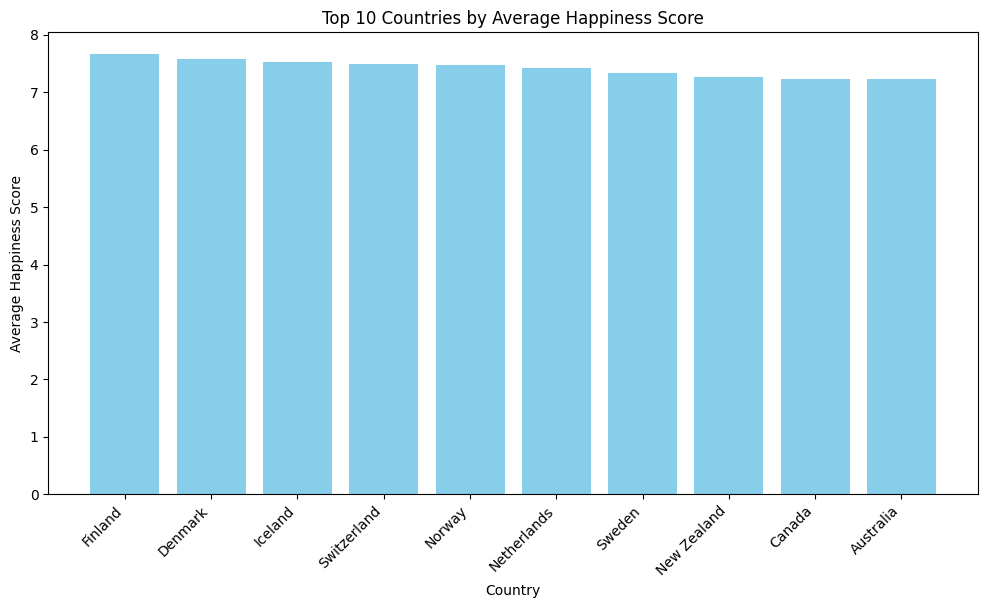

<Figure size 640x480 with 0 Axes>

In [43]:
top10 = per_country.sort_values("happiness_score", ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top10["country"], top10["happiness_score"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Countries by Average Happiness Score")
plt.xlabel("Country")
plt.ylabel("Average Happiness Score")
plt.show()
plt.savefig("figures/top10_countries_by_happiness_score.png")

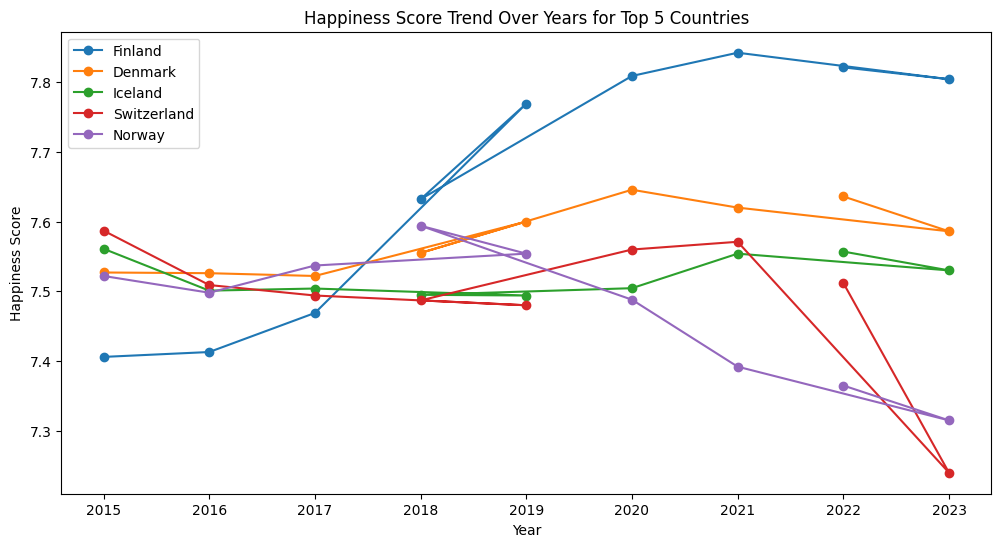

<Figure size 640x480 with 0 Axes>

In [44]:
top5_countries = top10["country"].head(5).tolist()
plt.figure(figsize=(12, 6))
for country in top5_countries:
    country_data = global_happiness_df[global_happiness_df["country"] == country]
    plt.plot(country_data["Year"], country_data["happiness_score"], marker="o", label=country)
plt.title("Happiness Score Trend Over Years for Top 5 Countries")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.legend()
plt.show()
plt.savefig("figures/happiness_score_trend_top5_countries.png")


# Quality of life index by country

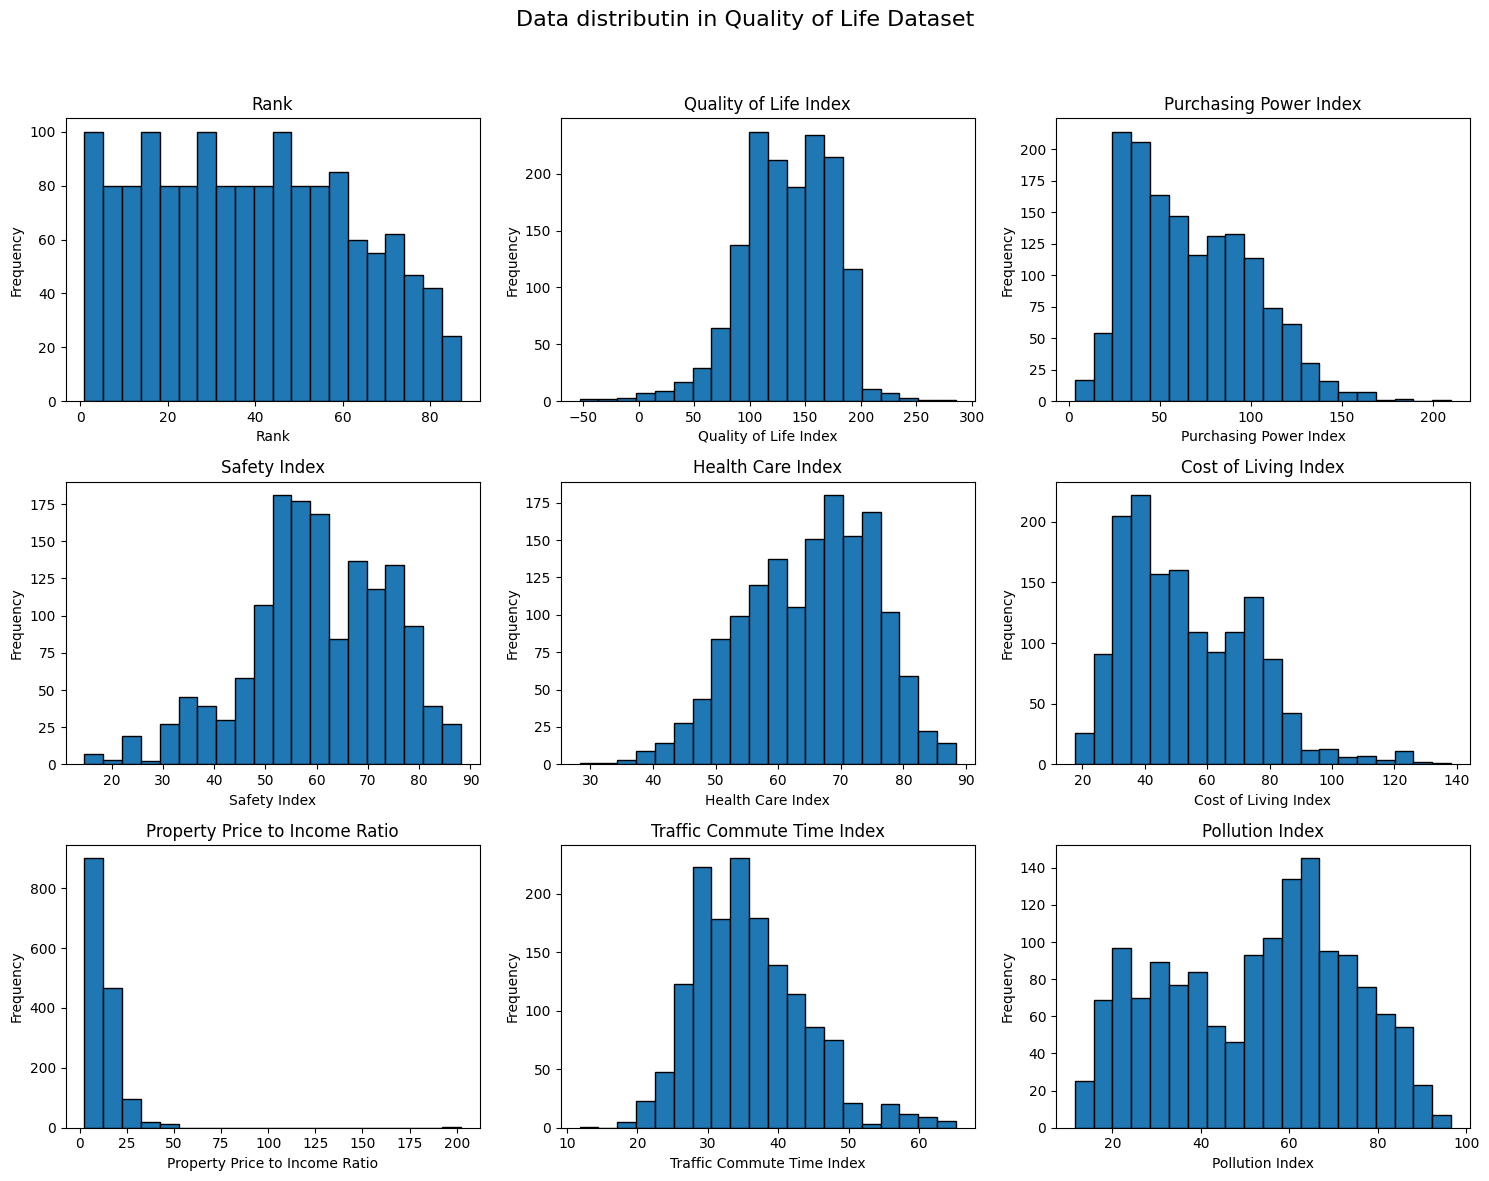

<Figure size 640x480 with 0 Axes>

In [54]:
numeric_cols_qol = qol_df.select_dtypes(include=[np.number]).columns.tolist()
if numeric_cols_qol:
    ncols = 3  
    nrows = (len(numeric_cols_qol) + ncols - 1) // ncols  
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
    axes = axes.flatten()  
    for i, col in enumerate(numeric_cols_qol):
        axes[i].hist(qol_df[col].dropna(), bins=20, edgecolor='black')
        axes[i].set_title(col)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")
  
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    fig.suptitle("Data distributin in Quality of Life Dataset", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    plt.savefig(f"figures/data_distribution_qol.png")


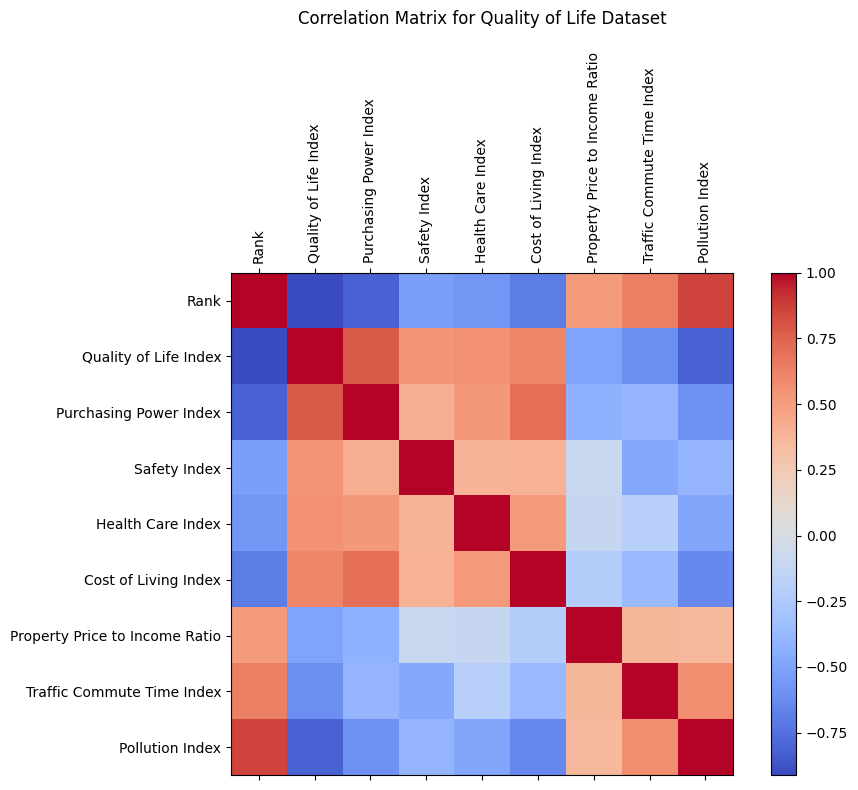

<Figure size 640x480 with 0 Axes>

In [55]:
corr_matrix = qol_df[numeric_cols_qol].corr()
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)
ax.set_xticks(range(len(numeric_cols_qol)))
ax.set_xticklabels(numeric_cols_qol, rotation=90)
ax.set_yticks(range(len(numeric_cols_qol)))
ax.set_yticklabels(numeric_cols_qol)
ax.set_title("Correlation Matrix for Quality of Life Dataset", pad=20)
plt.tight_layout()
plt.show()
plt.savefig(f"figures/correlation_matrix_qol.png")

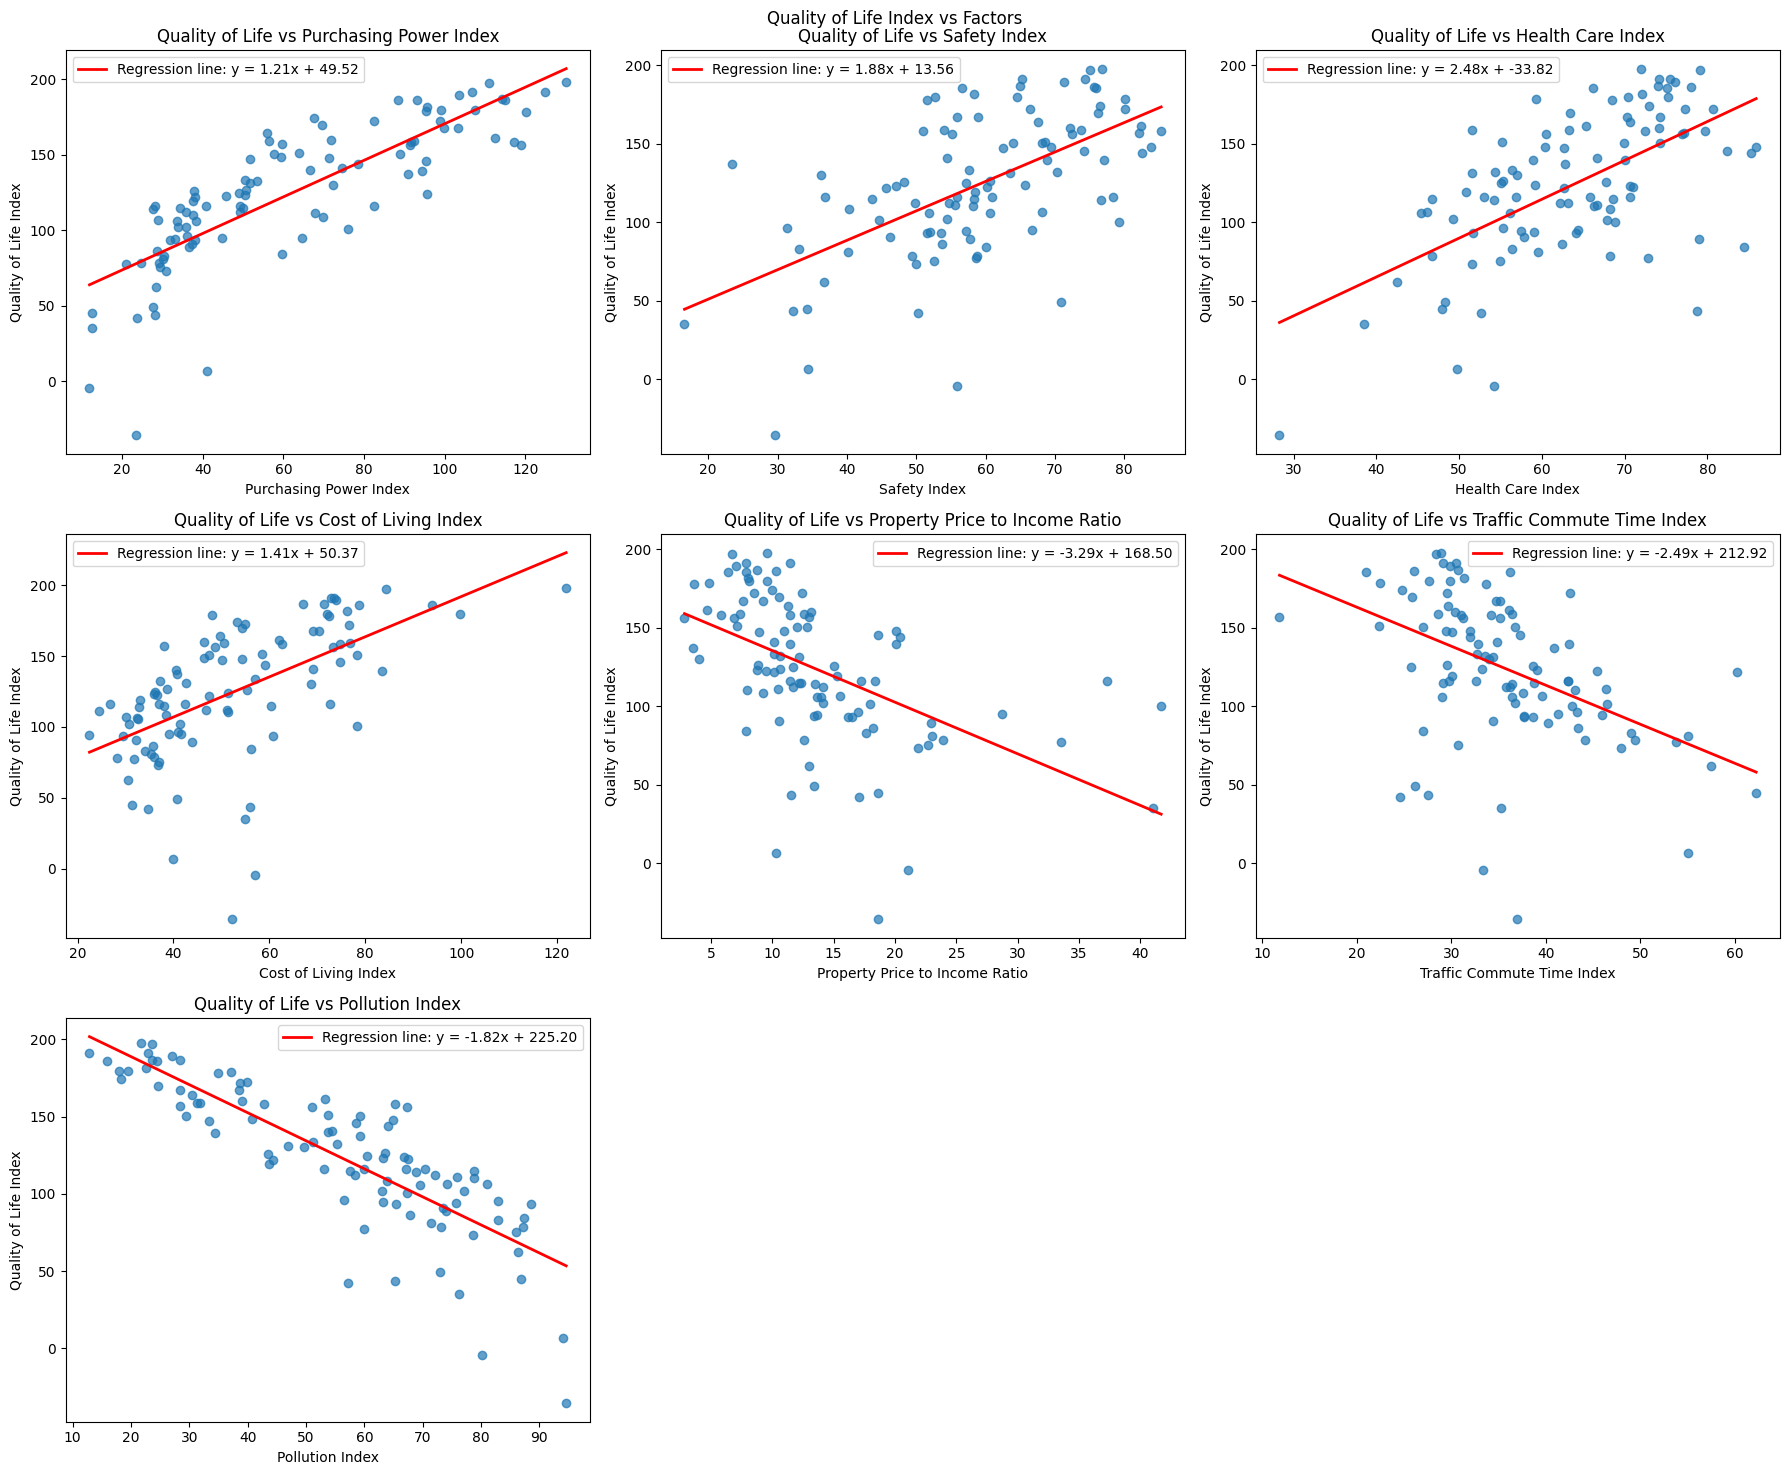

<Figure size 640x480 with 0 Axes>

In [37]:
factors = [
    "Purchasing Power Index",
    "Safety Index",
    "Health Care Index",
    "Cost of Living Index",
    "Property Price to Income Ratio",
    "Traffic Commute Time Index",
    "Pollution Index"
]

n = len(factors)
ncols = 3
nrows = (n + ncols - 1) // ncols 

fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 5 * nrows))
axes = axes.flatten() 
fig.suptitle("Quality of Life Index vs Factors")
for i, factor in enumerate(factors):

    x = country_agg[factor]
    y = country_agg["Quality of Life Index"]
    
    axes[i].scatter(x, y, alpha=0.7)
    

    mask = x.notna() & y.notna() 
    x_clean = x[mask]
    y_clean = y[mask]
    m, b = np.polyfit(x_clean, y_clean, 1)
    x_vals = np.linspace(x_clean.min(), x_clean.max(), 100)
    y_vals = m * x_vals + b
    axes[i].plot(x_vals, y_vals, color='red', lw=2, label=f'Regression line: y = {m:.2f}x + {b:.2f}')
    
    axes[i].set_xlabel(factor)
    axes[i].set_ylabel("Quality of Life Index")
    axes[i].set_title(f"Quality of Life vs {factor}")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
plt.savefig("figures/quality_of_life_vs_factors.png")

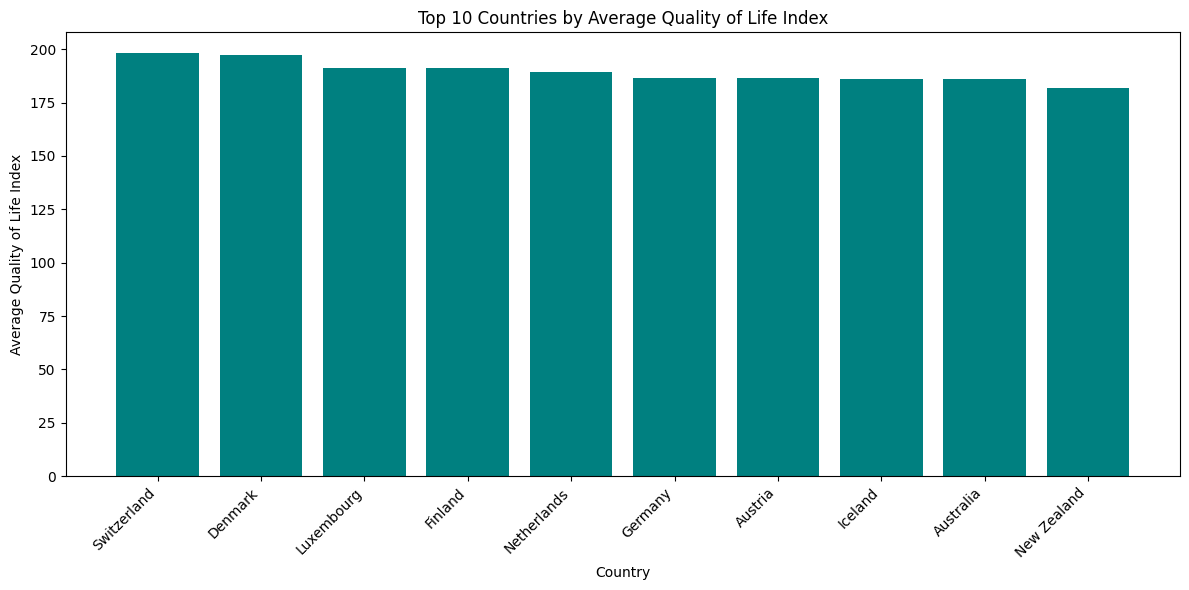

<Figure size 640x480 with 0 Axes>

In [35]:
top10_qol = country_agg.sort_values("Quality of Life Index", ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top10_qol["Country"], top10_qol["Quality of Life Index"], color="teal")
plt.xlabel("Country")
plt.ylabel("Average Quality of Life Index")
plt.title("Top 10 Countries by Average Quality of Life Index")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
plt.savefig("figures/top10_countries_qol.png")

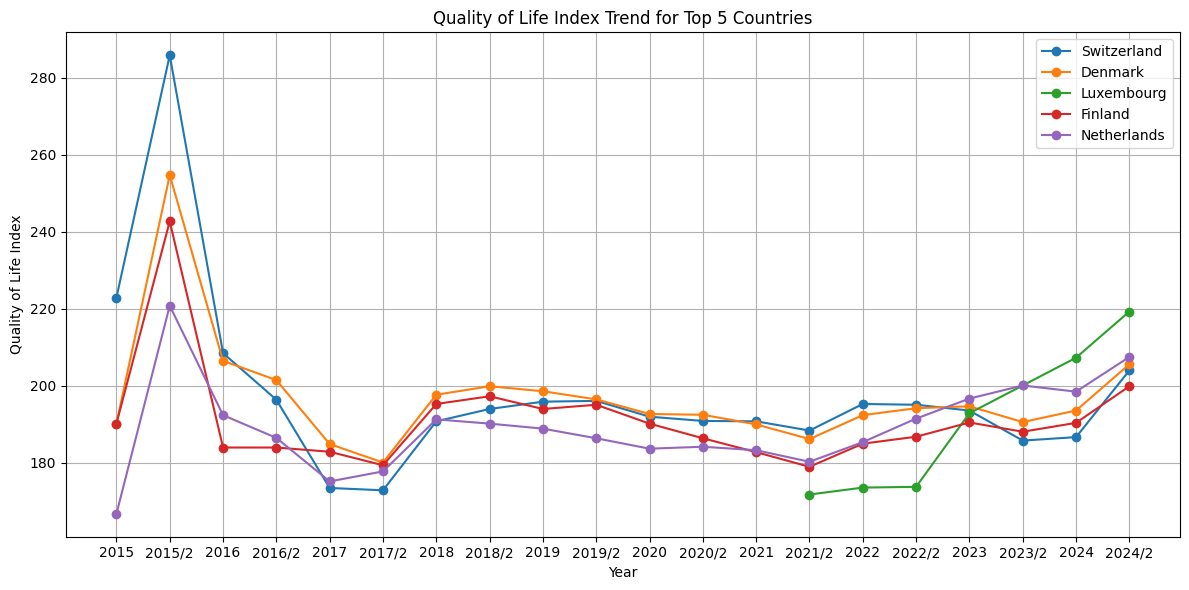

<Figure size 640x480 with 0 Axes>

In [36]:
top5_countries = top10_qol["Country"].head(5).tolist()

plt.figure(figsize=(12, 6))
for country in top5_countries:
    country_data = qol_df[qol_df["Country"] == country].sort_values("Year")
    plt.plot(country_data["Year"], country_data["Quality of Life Index"], marker="o", label=country)
plt.xlabel("Year")
plt.ylabel("Quality of Life Index")
plt.title("Quality of Life Index Trend for Top 5 Countries")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("figures/top5_countries_qol.png")

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (update the file path if needed)
df = pd.read_csv("csv/HDR23-24_Composite_indices_complete_time_series.csv", encoding="latin-1")
print(df.head())
print(df.info())
print(df.describe())

  iso3      country    hdicode region  hdi_rank_2022  hdi_1990  hdi_1991  \
0  AFG  Afghanistan        Low     SA          182.0     0.284     0.292   
1  ALB      Albania       High    ECA           74.0     0.649     0.632   
2  DZA      Algeria       High     AS           93.0     0.593     0.596   
3  AND      Andorra  Very High    NaN           35.0       NaN       NaN   
4  AGO       Angola     Medium    SSA          150.0       NaN       NaN   

   hdi_1992  hdi_1993  hdi_1994  ...  pop_total_2013  pop_total_2014  \
0     0.299     0.307     0.300  ...       31.541208       32.716210   
1     0.616     0.618     0.623  ...        2.887014        2.884102   
2     0.601     0.602     0.603  ...       38.000627       38.760168   
3       NaN       NaN       NaN  ...        0.071366        0.071622   
4       NaN       NaN       NaN  ...       26.147002       27.128336   

   pop_total_2015  pop_total_2016  pop_total_2017  pop_total_2018  \
0       33.753499       34.636207       3

In [52]:
#select le from 2021 for Norway
df_norway = df[(df["country"] == "Norway")]["le_2020"]
df_norway

130    83.195
Name: le_2020, dtype: float64

# HDI

HDI time series columns: ['hdi_1990', 'hdi_1991', 'hdi_1992', 'hdi_1993', 'hdi_1994', 'hdi_1995', 'hdi_1996', 'hdi_1997', 'hdi_1998', 'hdi_1999', 'hdi_2000', 'hdi_2001', 'hdi_2002', 'hdi_2003', 'hdi_2004', 'hdi_2005', 'hdi_2006', 'hdi_2007', 'hdi_2008', 'hdi_2009', 'hdi_2010', 'hdi_2011', 'hdi_2012', 'hdi_2013', 'hdi_2014', 'hdi_2015', 'hdi_2016', 'hdi_2017', 'hdi_2018', 'hdi_2019', 'hdi_2020', 'hdi_2021', 'hdi_2022']


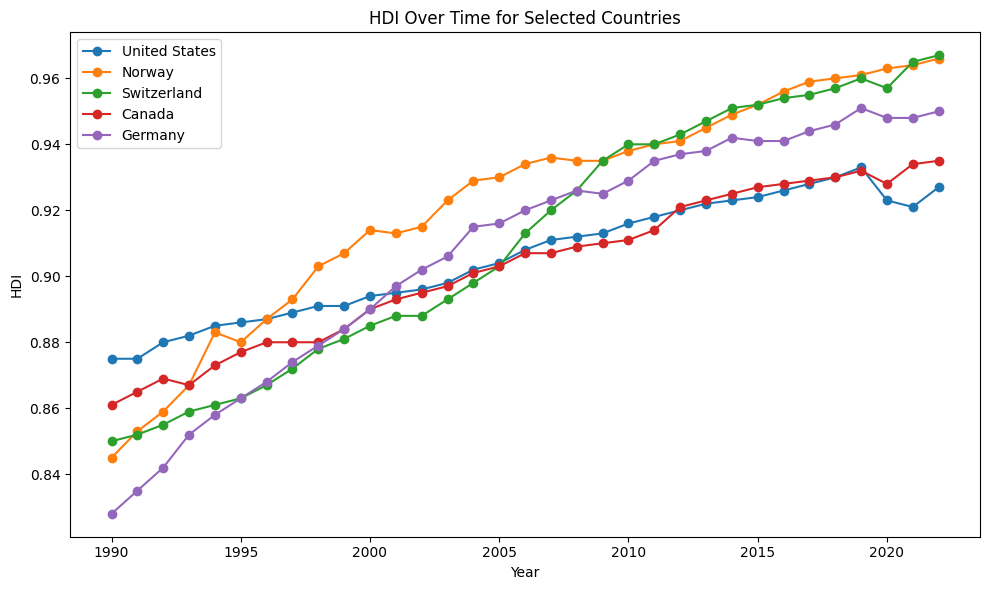

<Figure size 640x480 with 0 Axes>

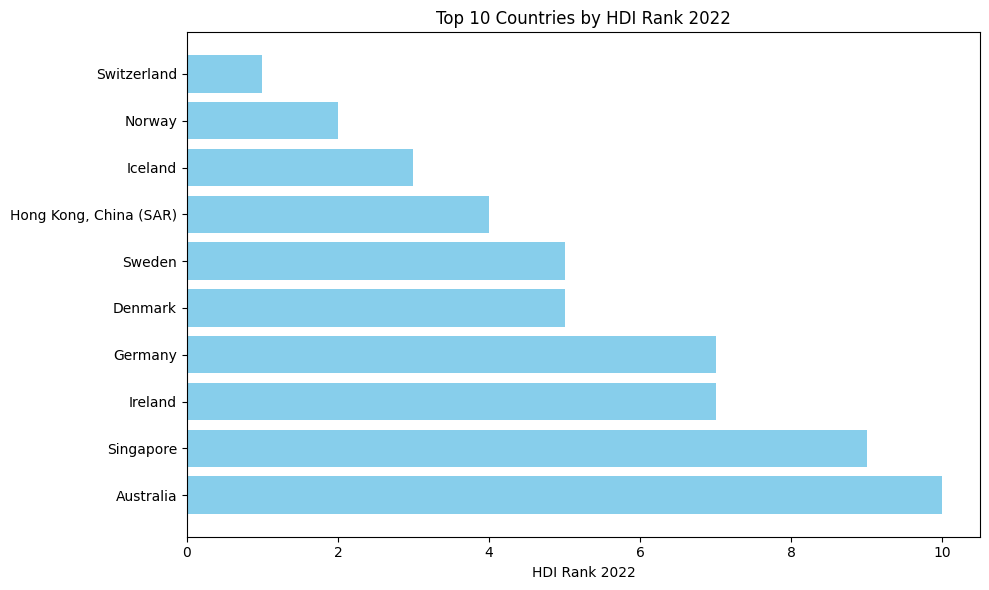

<Figure size 640x480 with 0 Axes>

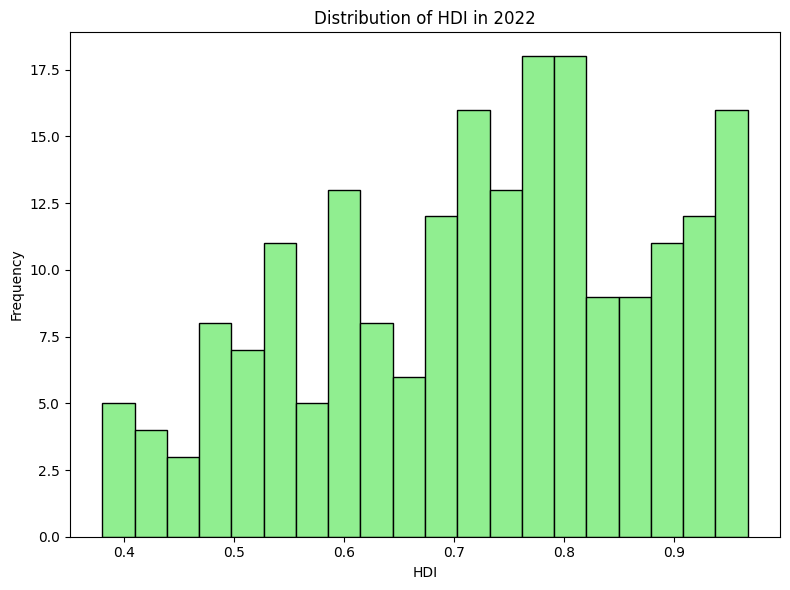

<Figure size 640x480 with 0 Axes>

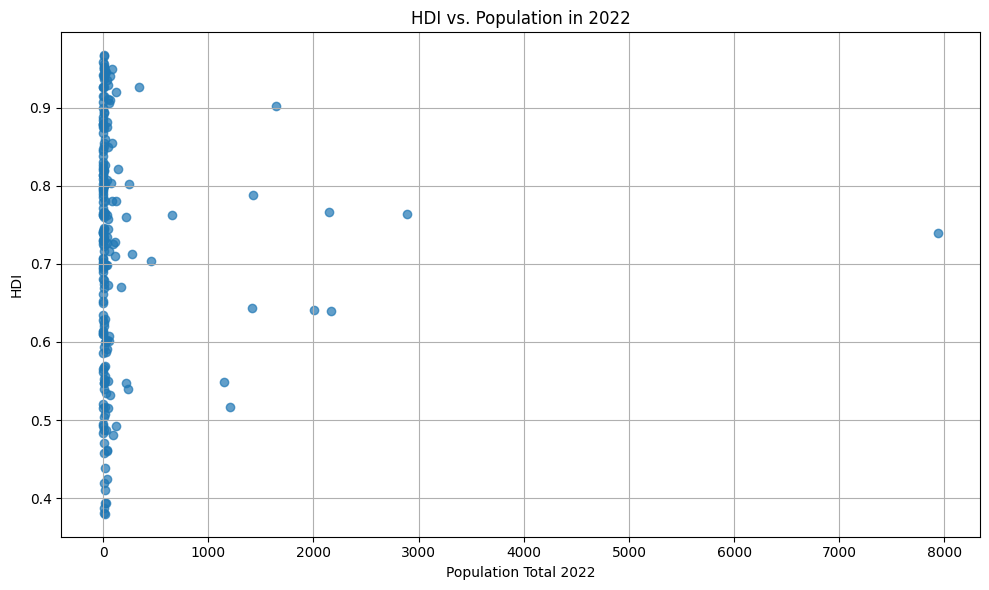

<Figure size 640x480 with 0 Axes>

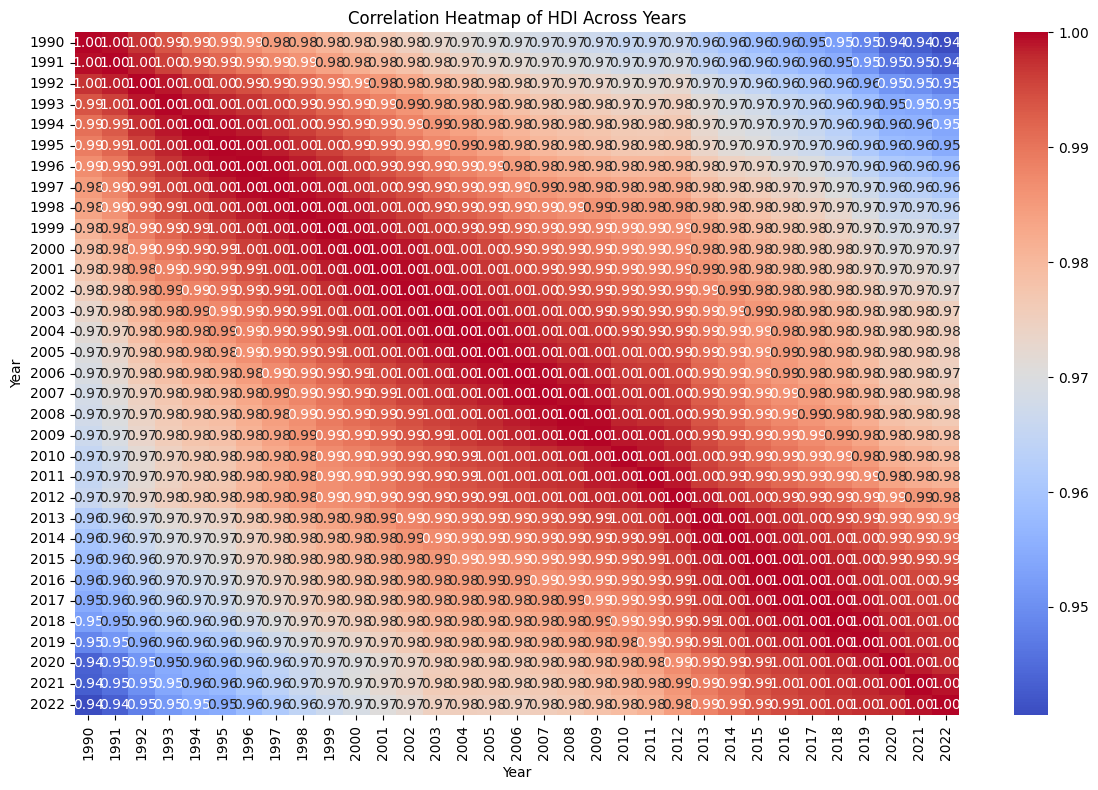

<Figure size 640x480 with 0 Axes>

In [81]:
import re
hdi_cols = [col for col in df.columns 
            if col.startswith("hdi_") and re.match(r'hdi_\d{4}$', col)]
print("HDI time series columns:", hdi_cols)

df_long = pd.melt(df,
                  id_vars=['iso3', 'country', 'hdicode', 'region', 'hdi_rank_2022'],
                  value_vars=hdi_cols,
                  var_name='Year',
                  value_name='HDI')


df_long['Year'] = df_long['Year'].str.replace('hdi_', '').astype(int)


selected_countries = ["United States", "Norway", "Switzerland", "Canada", "Germany"]

plt.figure(figsize=(10, 6))
for country in selected_countries:
    subset = df_long[df_long['country'] == country]
    plt.plot(subset['Year'], subset['HDI'], marker='o', label=country)
plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Over Time for Selected Countries")
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("figures/hdi_over_time.png")


df_rank = df[['country', 'hdi_rank_2022']].dropna().sort_values('hdi_rank_2022').head(10)
plt.figure(figsize=(10, 6))
plt.barh(df_rank['country'], df_rank['hdi_rank_2022'], color='skyblue')
plt.xlabel("HDI Rank 2022")
plt.title("Top 10 Countries by HDI Rank 2022")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()
plt.savefig("figures/top10_countries_hdi_rank.png")


most_recent_year = df_long['Year'].max()
df_recent = df_long[df_long['Year'] == most_recent_year]
plt.figure(figsize=(8, 6))
plt.hist(df_recent['HDI'].dropna(), bins=20, edgecolor='black', color='lightgreen')
plt.xlabel("HDI")
plt.ylabel("Frequency")
plt.title(f"Distribution of HDI in {most_recent_year}")
plt.tight_layout()
plt.show()
plt.savefig("figures/hdi_distribution.png")

if 'pop_total_2022' in df.columns:

    df_recent_pop = df_recent.merge(df[['country', 'pop_total_2022']], on='country', how='left')
    plt.figure(figsize=(10, 6))
    plt.scatter(df_recent_pop['pop_total_2022'], df_recent_pop['HDI'], alpha=0.7)
    plt.xlabel("Population Total 2022")
    plt.ylabel("HDI")
    plt.title(f"HDI vs. Population in {most_recent_year}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.savefig("figures/hdi_vs_population2022.png")
else:
    print("Column 'pop_total_2022' not found in the dataset.")


df_pivot = df_long.pivot(index='country', columns='Year', values='HDI')
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of HDI Across Years")
plt.tight_layout()
plt.show()
plt.savefig("figures/corr_heatmap_hdi.png")


## Base dataset preprocessing

In [ ]:
df_wide = pd.read_csv("csv/HDR23-24_Composite_indices_complete_time_series.csv", encoding="latin-1")


year_pattern = re.compile(r".+_\d{4}$")
non_year_cols = [col for col in df_wide.columns if not year_pattern.match(col)]

rows = []

for idx, row_data in df_wide.iterrows():

    base_info = {col: row_data[col] for col in non_year_cols}
    
    for col in df_wide.columns:
        match = re.match(r"^(.+?)_(\d{4})$", col)
        if match:
            prefix, year_str = match.groups()
            val = row_data[col]

            new_row = base_info.copy()
            new_row["Year"] = int(year_str)
            new_row["Indicator"] = prefix
            new_row["Value"] = val
            rows.append(new_row)


df_long = pd.DataFrame(rows)
df_long['region'] = df_long['region'].fillna("Unknown")
print(df_long.head(10))
print(df_long.info())

  iso3      country hdicode region  Year Indicator    Value
0  AFG  Afghanistan     Low     SA  2022  hdi_rank  182.000
1  AFG  Afghanistan     Low     SA  1990       hdi    0.284
2  AFG  Afghanistan     Low     SA  1991       hdi    0.292
3  AFG  Afghanistan     Low     SA  1992       hdi    0.299
4  AFG  Afghanistan     Low     SA  1993       hdi    0.307
5  AFG  Afghanistan     Low     SA  1994       hdi    0.300
6  AFG  Afghanistan     Low     SA  1995       hdi    0.318
7  AFG  Afghanistan     Low     SA  1996       hdi    0.326
8  AFG  Afghanistan     Low     SA  1997       hdi    0.330
9  AFG  Afghanistan     Low     SA  1998       hdi    0.329
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220832 entries, 0 to 220831
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   iso3       220832 non-null  object 
 1   country    220832 non-null  object 
 2   hdicode    206896 non-null  object 
 3   region     220832 no

In [24]:
df_pivot = df_long.pivot_table(
    index=["iso3", "country", "hdicode", "region", "Year"],
    columns="Indicator",
    values="Value"
).reset_index()

print(df_pivot.head(10))

Indicator iso3      country hdicode region  Year      abr  co2_prod  \
0          AFG  Afghanistan     Low     SA  1990  142.960  0.189279   
1          AFG  Afghanistan     Low     SA  1991  147.525  0.178155   
2          AFG  Afghanistan     Low     SA  1992  147.521  0.122920   
3          AFG  Afghanistan     Low     SA  1993  147.896  0.106179   
4          AFG  Afghanistan     Low     SA  1994  155.669  0.094063   
5          AFG  Afghanistan     Low     SA  1995  156.770  0.086321   
6          AFG  Afghanistan     Low     SA  1996  154.932  0.080092   
7          AFG  Afghanistan     Low     SA  1997  156.444  0.073316   
8          AFG  Afghanistan     Low     SA  1998  154.262  0.069134   
9          AFG  Afghanistan     Low     SA  1999  154.416  0.056669   

Indicator  coef_ineq  diff_hdi_phdi       eys  ...       mys     mys_f  \
0                NaN       1.056338  2.936460  ...  0.871962  0.201659   
1                NaN       1.027397  3.228456  ...  0.915267  0.218944

In [42]:
df_pivot[df_pivot["region"] == "Unknown"]["country"].unique()

array(['Andorra', 'Australia', 'Austria', 'Belgium', 'Bulgaria', 'Canada',
       'Switzerland', 'Cyprus', 'Czechia', 'Germany', 'Denmark', 'Spain',
       'Estonia', 'Finland', 'France', 'United Kingdom', 'Greece',
       'Hong Kong, China (SAR)', 'Croatia', 'Hungary', 'Ireland',
       'Iceland', 'Israel', 'Italy', 'Japan', 'Korea (Republic of)',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Latvia', 'Malta',
       'Netherlands', 'Norway', 'New Zealand', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'San Marino', 'Slovakia',
       'Slovenia', 'Sweden', 'United States'], dtype=object)

In [43]:
mapping_unknown = {
    "Andorra": "EU",
    "Australia": "OC",
    "Austria": "EU",
    "Belgium": "EU",
    "Bulgaria": "EU",
    "Canada": "NA",
    "Switzerland": "EU",
    "Cyprus": "EU",
    "Czechia": "EU",
    "Germany": "EU",
    "Denmark": "EU",
    "Spain": "EU",
    "Estonia": "EU",
    "Finland": "EU",
    "France": "EU",
    "United Kingdom": "EU",
    "Greece": "EU",
    "Hong Kong, China (SAR)": "AS",
    "Croatia": "EU",
    "Hungary": "EU",
    "Ireland": "EU",
    "Iceland": "EU",
    "Israel": "AS",
    "Italy": "EU",
    "Japan": "AS",
    "Korea (Republic of)": "AS",
    "Liechtenstein": "EU",
    "Lithuania": "EU",
    "Luxembourg": "EU",
    "Latvia": "EU",
    "Malta": "EU",
    "Netherlands": "EU",
    "Norway": "EU",
    "New Zealand": "OC",
    "Poland": "EU",
    "Portugal": "EU",
    "Romania": "EU",
    "Russian Federation": "EU",
    "San Marino": "EU",
    "Slovakia": "EU",
    "Slovenia": "EU",
    "Sweden": "EU",
    "United States": "NA"
}

# Update rows in df_pivot where region is "Unknown" using the mapping dictionary.
df_pivot.loc[df_pivot["region"] == "Unknown", "region"] = df_pivot.loc[df_pivot["region"] == "Unknown", "country"].map(mapping_unknown)


In [44]:
df_pivot.to_csv("csv/HDIdataset.csv", index=False)

## Visu

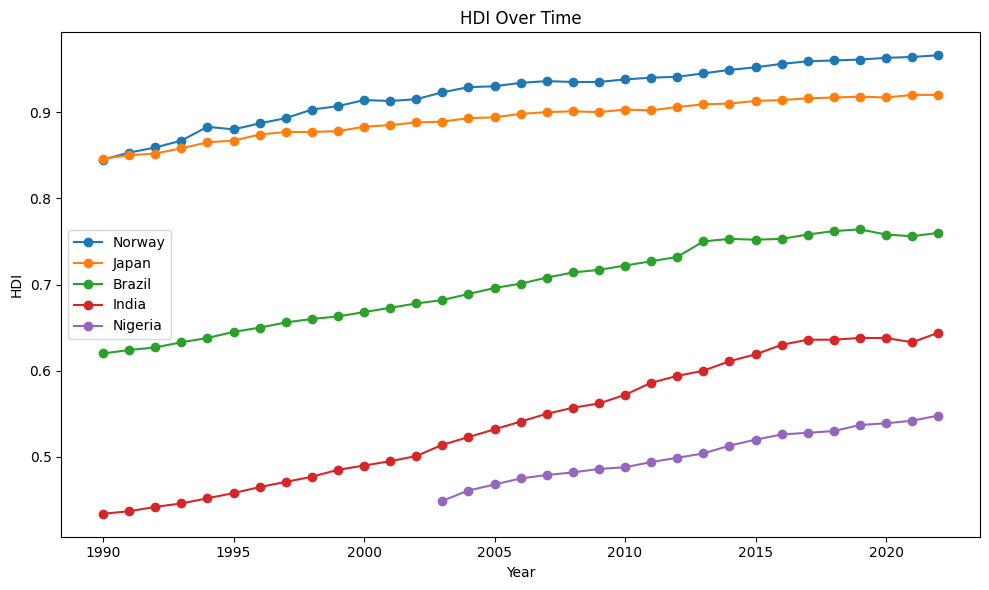

<Figure size 640x480 with 0 Axes>

In [82]:
selected_countries = ["Norway", "Japan", "Brazil", "India", "Nigeria"]

plt.figure(figsize=(10, 6))
for country in selected_countries:
    subset = hdi_df[hdi_df["country"] == country].dropna(subset=["Year", "hdi"])
    subset = subset.sort_values("Year")
    plt.plot(subset["Year"], subset["hdi"], marker="o", label=country)

plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Over Time")
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig("figures/hdi_over_time_5countries.png")

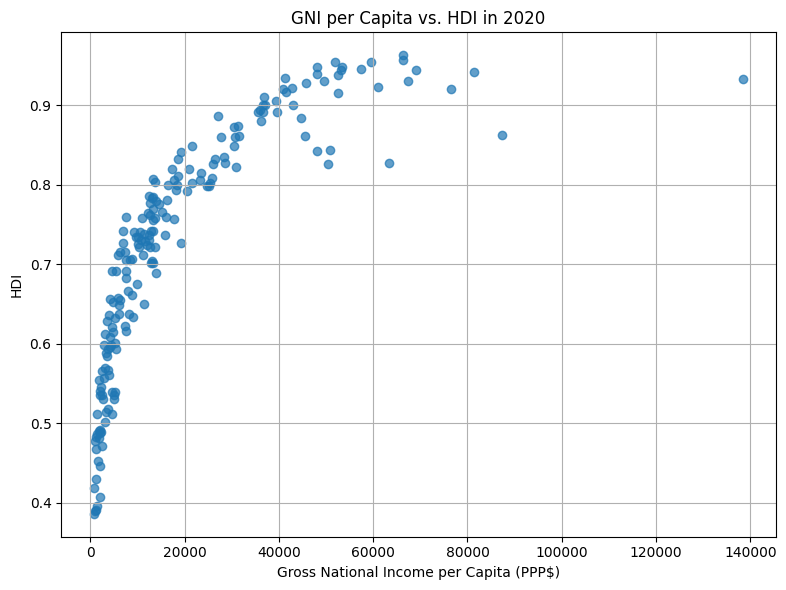

<Figure size 640x480 with 0 Axes>

In [83]:
year_chosen = 2020
subset_year = hdi_df[hdi_df["Year"] == year_chosen].dropna(subset=["gnipc", "hdi"])

plt.figure(figsize=(8, 6))
plt.scatter(subset_year["gnipc"], subset_year["hdi"], alpha=0.7)
plt.xlabel("Gross National Income per Capita (PPP$)")
plt.ylabel("HDI")
plt.title(f"GNI per Capita vs. HDI in {year_chosen}")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("figures/gni_vs_hdi.png")


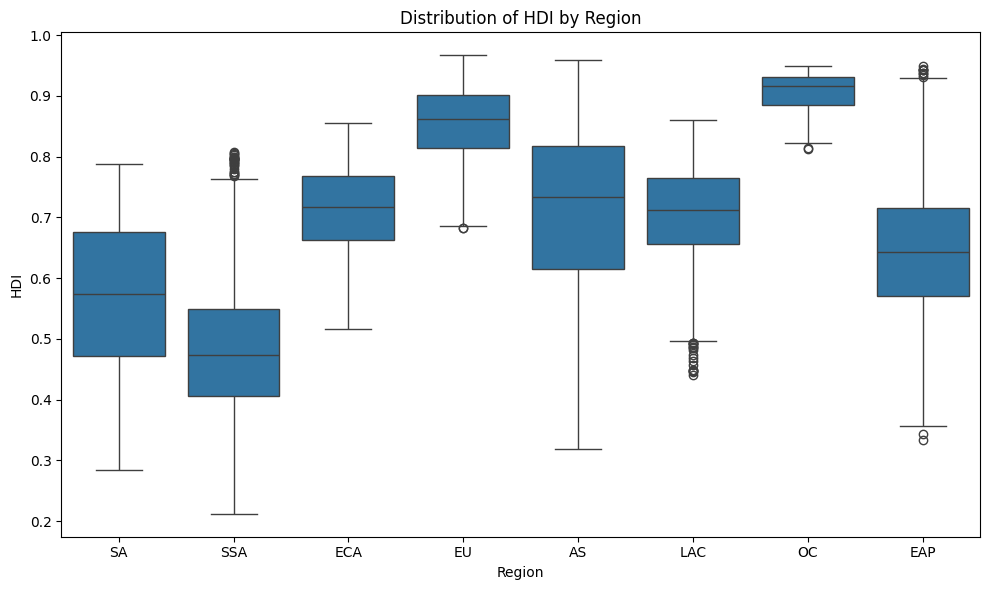

<Figure size 640x480 with 0 Axes>

In [84]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='hdi', data=hdi_df)
plt.title("Distribution of HDI by Region")
plt.xlabel("Region")
plt.ylabel("HDI")
plt.tight_layout()
plt.show()
plt.savefig("figures/hdi_by_region.png")

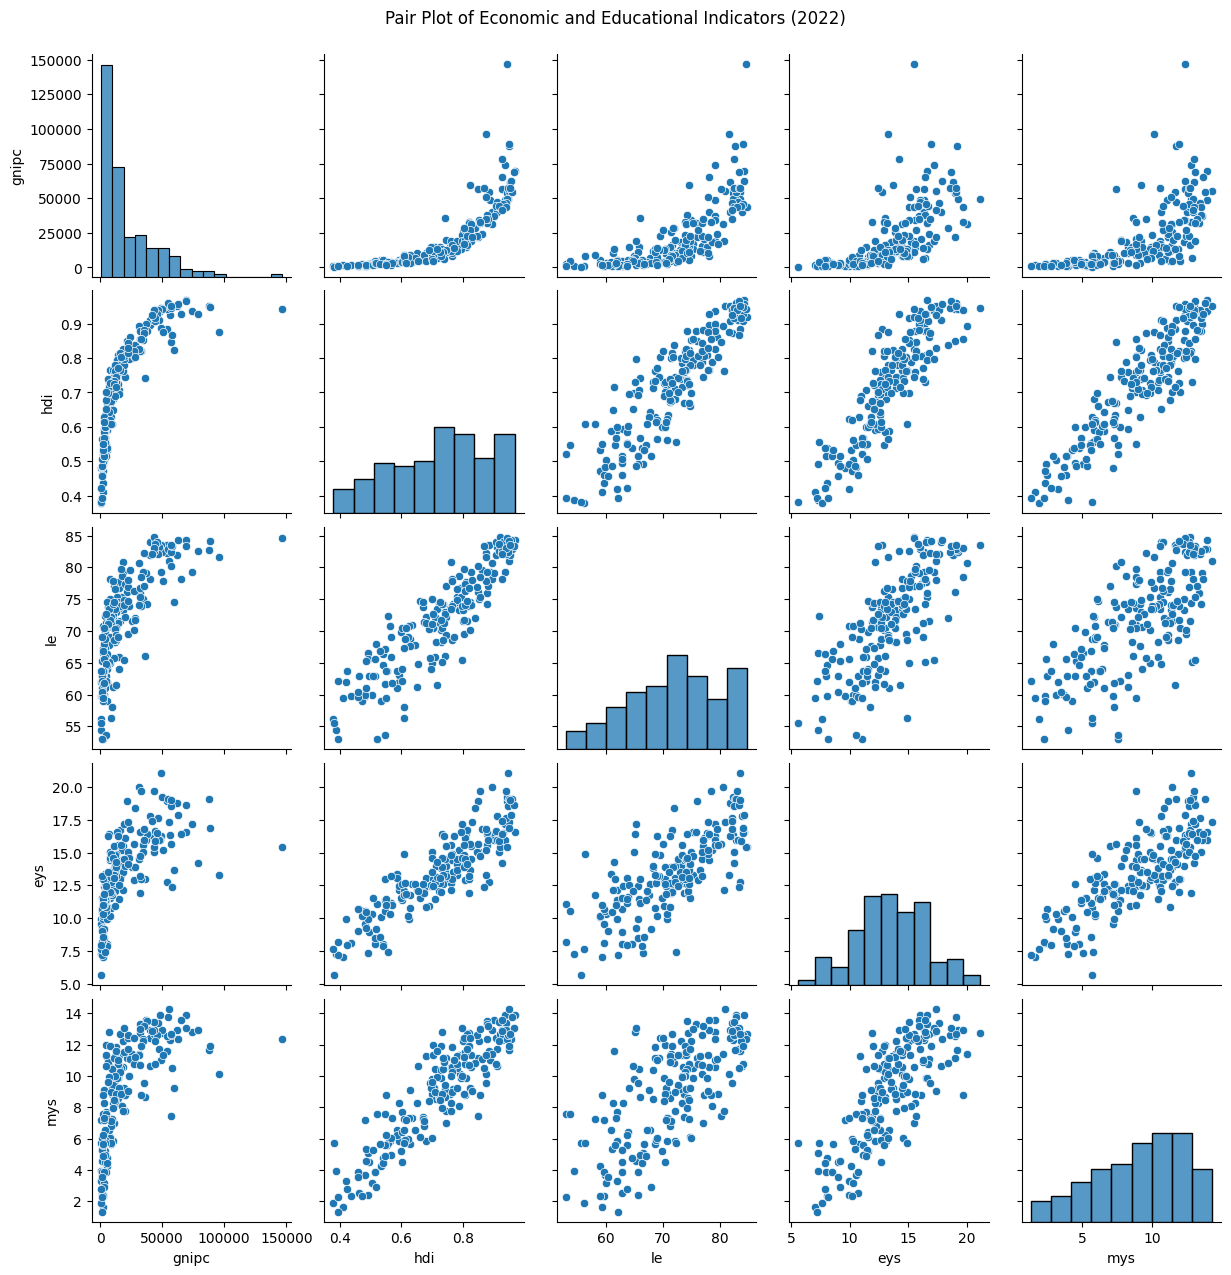

<Figure size 640x480 with 0 Axes>

In [85]:
subset_2022 = hdi_df[hdi_df["Year"] == 2022]

cols_of_interest = ["gnipc", "hdi", "le", "eys", "mys"]

sns.pairplot(subset_2022[cols_of_interest])
plt.suptitle("Pair Plot of Economic and Educational Indicators (2022)", y=1.02)
plt.show()
plt.savefig("figures/pairplot_2022.png")

/var/folders/xf/15zphhjs383crp3cswfpy_280000gn/T/ipykernel_41517/473616478.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="region", y="pop_total", data=pop_by_region, palette="viridis")


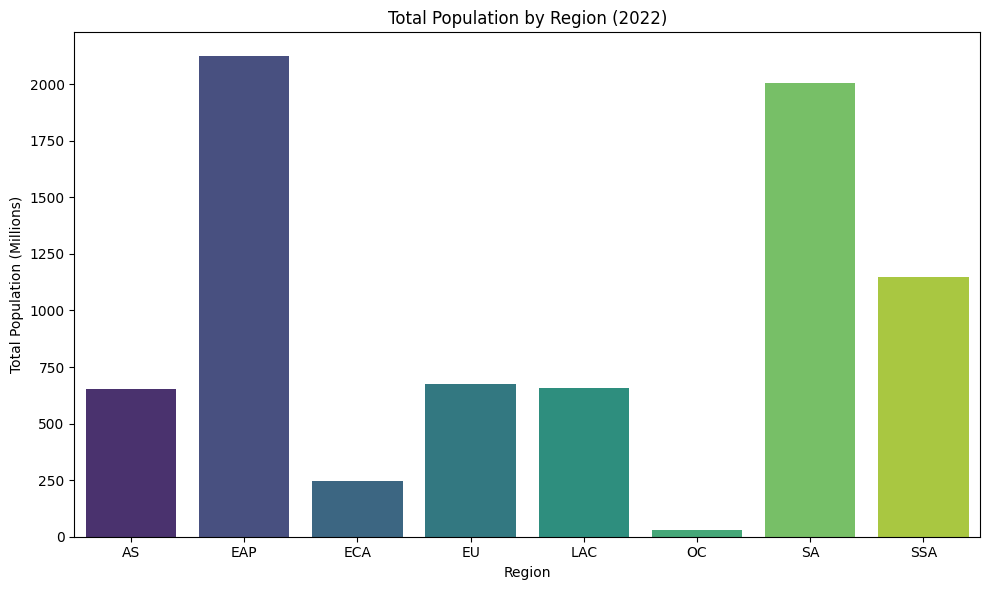

<Figure size 640x480 with 0 Axes>

In [86]:
subset_2022 = hdi_df[hdi_df["Year"] == 2022]

pop_by_region = subset_2022.groupby("region")["pop_total"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="region", y="pop_total", data=pop_by_region, palette="viridis")
plt.title("Total Population by Region (2022)")
plt.xlabel("Region")
plt.ylabel("Total Population (Millions)")
plt.tight_layout()
plt.show()
plt.savefig("figures/population_by_region2022.png")


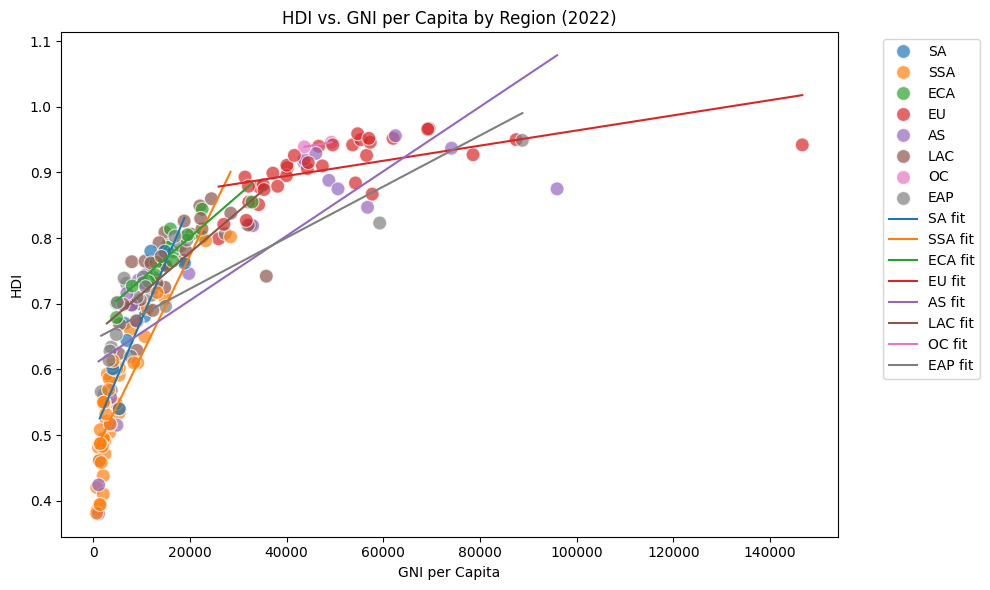

<Figure size 640x480 with 0 Axes>

In [87]:
import numpy as np
subset_2022 = hdi_df[hdi_df["Year"] == 2022].dropna(subset=["hdi", "gnipc", "region"])

plt.figure(figsize=(10, 6))
sns.scatterplot(x="gnipc", y="hdi", hue="region", data=subset_2022, s=100, alpha=0.7)

regions = subset_2022["region"].unique()
for reg in regions:
    reg_data = subset_2022[subset_2022["region"] == reg]
    x = reg_data["gnipc"]
    y = reg_data["hdi"]
    m, b = np.polyfit(x, y, 1)
    x_vals = np.linspace(x.min(), x.max(), 100)
    y_vals = m * x_vals + b
    plt.plot(x_vals, y_vals, label=f"{reg} fit")

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("HDI vs. GNI per Capita by Region (2022)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
plt.savefig("figures/hdi_vs_gnipc_by_region.png")

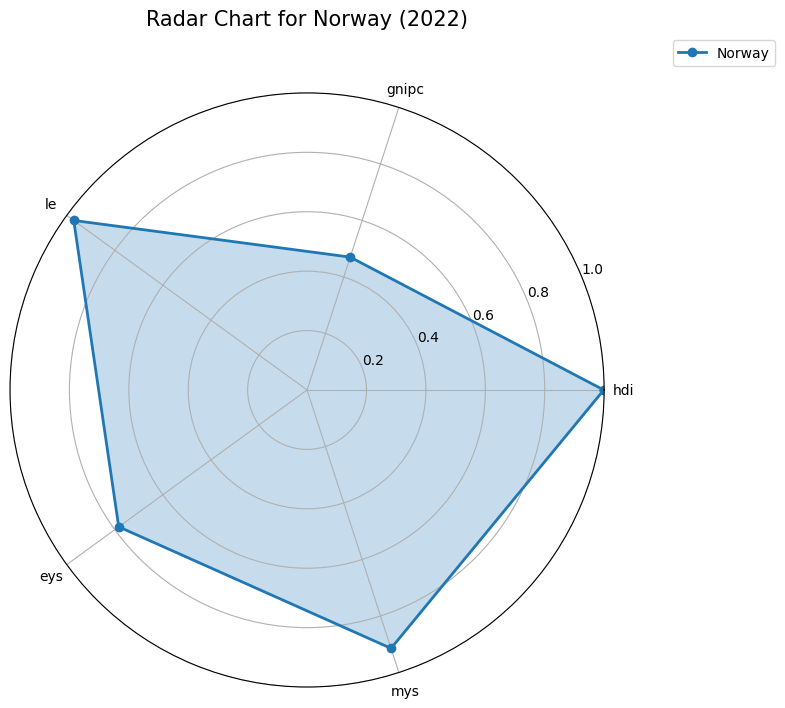

<Figure size 640x480 with 0 Axes>

In [88]:
country_name = "Norway"
year_selected = 2022

data_country = hdi_df[(hdi_df["country"].str.strip() == country_name) & (hdi_df["Year"] == year_selected)]
if data_country.empty:
    print(f"No data found for {country_name} in {year_selected}.")
else:
    data_country = data_country.iloc[0]
    
    indicators = ["hdi", "gnipc", "le", "eys", "mys"]
    indicators = [ind for ind in indicators if ind in hdi_df.columns]
    
    norm_values = []
    for ind in indicators:
        col_values = hdi_df[ind].dropna()
        min_val = col_values.min()
        max_val = col_values.max()
        norm = (data_country[ind] - min_val) / (max_val - min_val) if max_val - min_val > 0 else 0.0
        norm_values.append(norm)
    norm_values += norm_values[:1] 
    
    angles = np.linspace(0, 2 * np.pi, len(indicators), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.plot(angles, norm_values, 'o-', linewidth=2, label=country_name)
    ax.fill(angles, norm_values, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), indicators, fontsize=10)
    ax.set_rlim(0, 1)
    ax.set_title(f"Radar Chart for {country_name} ({year_selected})", size=15, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()
    plt.savefig("figures/radar_chart_norway.png")

In [89]:
pop_by_region = df_pivot.dropna(subset=["pop_total"]).groupby(["region", "Year"])["pop_total"].sum().reset_index()

pop_pivot = pop_by_region.pivot(index="Year", columns="region", values="pop_total").fillna(0)

plt.figure(figsize=(12, 6))
pop_pivot.plot.area(alpha=0.8, figsize=(12,6))
plt.xlabel("Year")
plt.ylabel("Total Population (Millions)")
plt.title("Population Growth by Region Over Time")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
plt.savefig("figures/population_growth_by_region.png")

KeyError: ['pop_total']

/var/folders/xf/15zphhjs383crp3cswfpy_280000gn/T/ipykernel_41517/1857708046.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="region", y="le", data=subset_le, palette="muted")


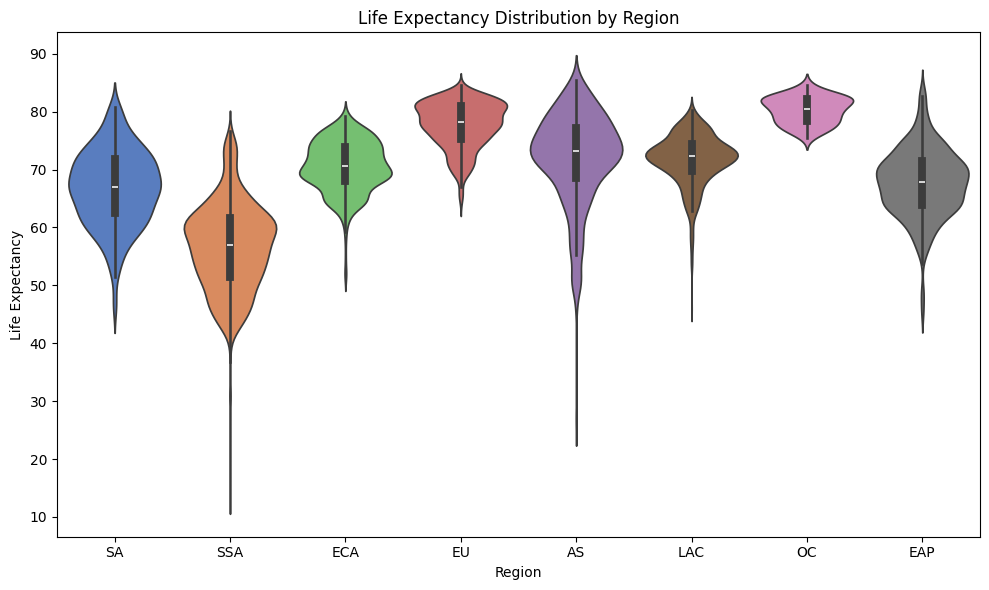

<Figure size 640x480 with 0 Axes>

In [90]:
subset_le = hdi_df.dropna(subset=["le", "region"])

plt.figure(figsize=(10, 6))
sns.violinplot(x="region", y="le", data=subset_le, palette="muted")
plt.title("Life Expectancy Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Life Expectancy")
plt.tight_layout()
plt.show()
plt.savefig("figures/life_expectancy_by_region.png")

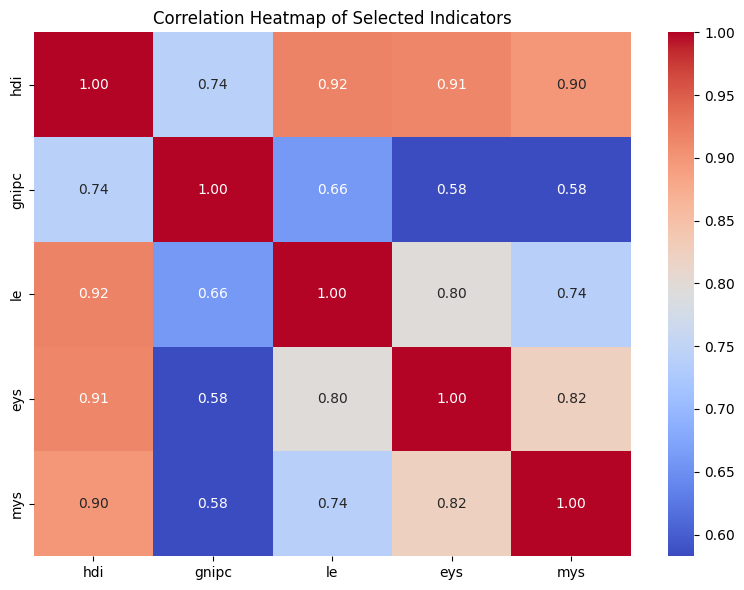

<Figure size 640x480 with 0 Axes>

In [91]:
indicators = ["hdi", "gnipc", "le", "eys", "mys"]

df_indicators = hdi_df[indicators].dropna()

corr_matrix = df_indicators.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Selected Indicators")
plt.tight_layout()
plt.show()
plt.savefig("figures/corr_heatmap_indicators.png")

## Analysis on missing columns

In [ ]:
df_15_22 = hdi_df[(hdi_df["Year"] >= 2015) & (hdi_df["Year"] <= 2022)]
print("Years present in filtered data:", sorted(df_15_22["Year"].unique()))

all_missing = df_15_22.isnull().sum()
print("Missing values in all columns (2015-2022):")
print(all_missing)

Years present in filtered data: [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
Missing values in all columns (2015-2022):
iso3                    0
country                 0
hdicode                 0
region                 16
Year                    0
abr                     0
co2_prod                8
coef_ineq             261
diff_hdi_phdi         319
eys                     7
eys_f                   7
eys_m                   7
gdi                   111
gdi_group            1362
gii                   244
gii_rank             1378
gni_pc_f              108
gni_pc_m              108
gnipc                   0
hdi                     7
hdi_f                 111
hdi_m                 111
hdi_rank             1351
ihdi                  261
ineq_edu              150
ineq_inc              184
ineq_le                 0
le                      0
le_f                    0
le_m                    0
lfpr_f                108
lfpr_m                108
loss                  261
mf                

In [ ]:
df_15_22 = hdi_df[(hdi_df["Year"] >= 2015) & (hdi_df["Year"] <= 2022)]

df_missing = df_15_22[df_15_22.isnull().any(axis=1)]

for idx, row in df_missing.iterrows():
    missing_cols = row.index[row.isnull()].tolist()
    print(f"Country: {row['country']}, Year: {row['Year']}, Missing Columns: {missing_cols}")


Country: Afghanistan, Year: 2015, Missing Columns: ['gdi_group', 'gii_rank', 'hdi_rank', 'rankdiff_hdi_phdi']
Country: Afghanistan, Year: 2016, Missing Columns: ['gdi_group', 'gii_rank', 'hdi_rank', 'rankdiff_hdi_phdi']
Country: Afghanistan, Year: 2017, Missing Columns: ['gdi_group', 'gii_rank', 'hdi_rank', 'rankdiff_hdi_phdi']
Country: Afghanistan, Year: 2018, Missing Columns: ['gdi_group', 'gii_rank', 'hdi_rank', 'rankdiff_hdi_phdi']
Country: Afghanistan, Year: 2019, Missing Columns: ['gdi_group', 'gii_rank', 'hdi_rank', 'rankdiff_hdi_phdi']
Country: Afghanistan, Year: 2020, Missing Columns: ['gdi_group', 'gii_rank', 'hdi_rank', 'rankdiff_hdi_phdi']
Country: Afghanistan, Year: 2021, Missing Columns: ['gdi_group', 'gii_rank', 'hdi_rank', 'rankdiff_hdi_phdi']
Country: Angola, Year: 2015, Missing Columns: ['gdi_group', 'gii_rank', 'hdi_rank', 'rankdiff_hdi_phdi']
Country: Angola, Year: 2016, Missing Columns: ['gdi_group', 'gii_rank', 'hdi_rank', 'rankdiff_hdi_phdi']
Country: Angola, Yea

In [ ]:
import pandas as pd


df_15_22 = hdi_df[(hdi_df["Year"] >= 2015) & (hdi_df["Year"] <= 2022)]

cols_to_check = ['gdi_group', 'gii_rank', 'hdi_rank', 'rankdiff_hdi_phdi']

df_15_22.loc[df_15_22["Year"] != 2022, cols_to_check] = -1


missing_by_country = {}
unique_missing_columns = set()


for idx, row in df_15_22.iterrows():
    country = row["country"]
    year = row["Year"]
    for col in df_15_22.columns:
        if pd.isnull(row[col]):
            unique_missing_columns.add(col)
            if country not in missing_by_country:
                missing_by_country[country] = {}
            if col not in missing_by_country[country]:
                missing_by_country[country][col] = set()
            missing_by_country[country][col].add(year)


for country, missing_cols in missing_by_country.items():
    print(f"Country: {country}")
    for col, years in missing_cols.items():
        years_list = sorted(set(years))
        print(f"   {col}: {', '.join(map(str, years_list))}")

print("\nUnique columns that are missing (or marked as missing):")
print(", ".join(sorted(unique_missing_columns)))


Country: Andorra
   coef_ineq: 2015
   diff_hdi_phdi: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
   gdi: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
   gii: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
   gni_pc_f: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
   gni_pc_m: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
   hdi_f: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
   hdi_m: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
   ihdi: 2015
   ineq_inc: 2015
   lfpr_f: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
   lfpr_m: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
   loss: 2015
   mf: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
   mmr: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
   phdi: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
   gdi_group: 2022
   gii_rank: 2022
   rankdiff_hdi_phdi: 2022
Country: United Arab Emirates
   coef_ineq: 2015
   ihdi: 2015
   ineq_edu: 2015
   loss: 2015
Country: Antigua and Barbuda
   coef_ineq: 2015, 2016, 2017, 2018, 20

In [109]:
len(df_15_22["country"].unique().tolist())

193

In [110]:
unique_missing_countries = sorted(set(missing_by_country.keys()))
print("\nUnique countries with missing data:")
print(", ".join(unique_missing_countries))
print(len(unique_missing_countries))


Unique countries with missing data:
Andorra, Antigua and Barbuda, Bahrain, Barbados, Belarus, Belize, Benin, Brunei Darussalam, Cabo Verde, Canada, Central African Republic, Chad, Comoros, Cuba, Côte d'Ivoire, Djibouti, Dominica, Equatorial Guinea, Eritrea, Eswatini (Kingdom of), Fiji, Grenada, Guinea, Guinea-Bissau, Guyana, Hong Kong, China (SAR), Kiribati, Kuwait, Lebanon, Lesotho, Libya, Liechtenstein, Maldives, Marshall Islands, Mauritius, Micronesia (Federated States of), Montenegro, Nauru, Palau, Palestine, State of, Papua New Guinea, Qatar, Saint Kitts and Nevis, Saint Lucia, Saint Vincent and the Grenadines, Samoa, San Marino, Sao Tome and Principe, Saudi Arabia, Seychelles, Solomon Islands, Somalia, South Sudan, Sri Lanka, Suriname, Syrian Arab Republic, Timor-Leste, Tonga, Trinidad and Tobago, Turkmenistan, Tuvalu, United Arab Emirates, United States, Uzbekistan, Vanuatu
65


In [113]:
missing_by_country["Andorra"]

{'coef_ineq': [2015],
 'diff_hdi_phdi': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
 'gdi': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
 'gii': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
 'gni_pc_f': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
 'gni_pc_m': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
 'hdi_f': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
 'hdi_m': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
 'ihdi': [2015],
 'ineq_inc': [2015],
 'lfpr_f': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
 'lfpr_m': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
 'loss': [2015],
 'mf': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
 'mmr': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
 'phdi': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
 'gdi_group': [2022],
 'gii_rank': [2022],
 'rankdiff_hdi_phdi': [2022]}

In [ ]:

missing_years_union = {}
for country, missing_info in missing_by_country.items():
    union_years = set()
    for col, years in missing_info.items():
        union_years.update(years)
    missing_years_union[country] = union_years

missing_years_counts = [len(years) for years in missing_years_union.values()]

expected_years = 8  

overall_mean_missing_years = np.mean(missing_years_counts) if missing_years_counts else 0
overall_median_missing_years = np.median(missing_years_counts) if missing_years_counts else 0

print("\nOverall Unique Missing Years Stats (per country):")
print(f"  Mean unique missing years: {overall_mean_missing_years:.2f} (out of {expected_years} possible years)")
print(f"  Median unique missing years: {overall_median_missing_years:.2f} (out of {expected_years} possible years)")


print("\nUnique missing years per country:")
for country, years in missing_years_union.items():
    print(f"  {country}: {', '.join(map(str, sorted(years)))}")


unique_missing_countries = sorted(missing_by_country.keys())
print("\nUnique countries with missing data:")
print(", ".join(unique_missing_countries))


Overall Unique Missing Years Stats (per country):
  Mean unique missing years: 7.37 (out of 8 possible years)
  Median unique missing years: 8.00 (out of 8 possible years)

Unique missing years per country:
  Andorra: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
  United Arab Emirates: 2015
  Antigua and Barbuda: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
  Benin: 2015, 2016, 2017, 2018
  Bahrain: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
  Belarus: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
  Belize: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
  Barbados: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
  Brunei Darussalam: 2015
  Central African Republic: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
  Canada: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
  Côte d'Ivoire: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
  Comoros: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
  Cabo Verde: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022
  Cuba: 2015, 2016, 2017, 2018

In [ ]:
missing_columns_counts = []  
missing_years_counts = []   

for country, missing_info in missing_by_country.items():
    num_missing_cols = len(missing_info)
    missing_columns_counts.append(num_missing_cols)
    missing_years.append(years for years in missing_info.values())
    missing_years_counts.append(total_missing_years)

overall_mean_missing_cols = np.mean(missing_columns_counts) if missing_columns_counts else 0
overall_median_missing_cols = np.median(missing_columns_counts) if missing_columns_counts else 0
overall_mean_missing_years = np.mean(missing_years_counts) if missing_years_counts else 0
overall_median_missing_years = np.median(missing_years_counts) if missing_years_counts else 0


print("Overall Missing Data Stats (per country):")
print(f"  Mean number of missing columns: {overall_mean_missing_cols:.2f}")
print(f"  Median number of missing columns: {overall_median_missing_cols:.2f}")
print(f"  Mean number of missing years: {overall_mean_missing_years:.2f}")
print(f"  Median number of missing years: {overall_median_missing_years:.2f}")


missing_stats_by_column = {}
cols_to_check = ['gdi_group', 'gii_rank', 'hdi_rank', 'rankdiff_hdi_phdi']

for col in cols_to_check:
    missing_years_list = []
    for country, missing_info in missing_by_country.items():
        if col in missing_info:
            missing_years_list.append(len(missing_info[col]))
    if missing_years_list:
        missing_stats_by_column[col] = {
            "mean": np.mean(missing_years_list),
            "median": np.median(missing_years_list)
        }

print("\nMissing Stats by Column:")
for col, stats in missing_stats_by_column.items():
    print(f"  {col}: mean missing years = {stats['mean']:.2f}, median missing years = {stats['median']:.2f}")

Overall Missing Data Stats (per country):
  Mean number of missing columns: 9.11
  Median number of missing columns: 8.00
  Mean number of missing years: 55.69
  Median number of missing years: 49.00

Missing Stats by Column:
  gdi_group: mean missing years = 1.00, median missing years = 1.00
  gii_rank: mean missing years = 1.00, median missing years = 1.00
  rankdiff_hdi_phdi: mean missing years = 1.00, median missing years = 1.00


# Mental Health Dataset

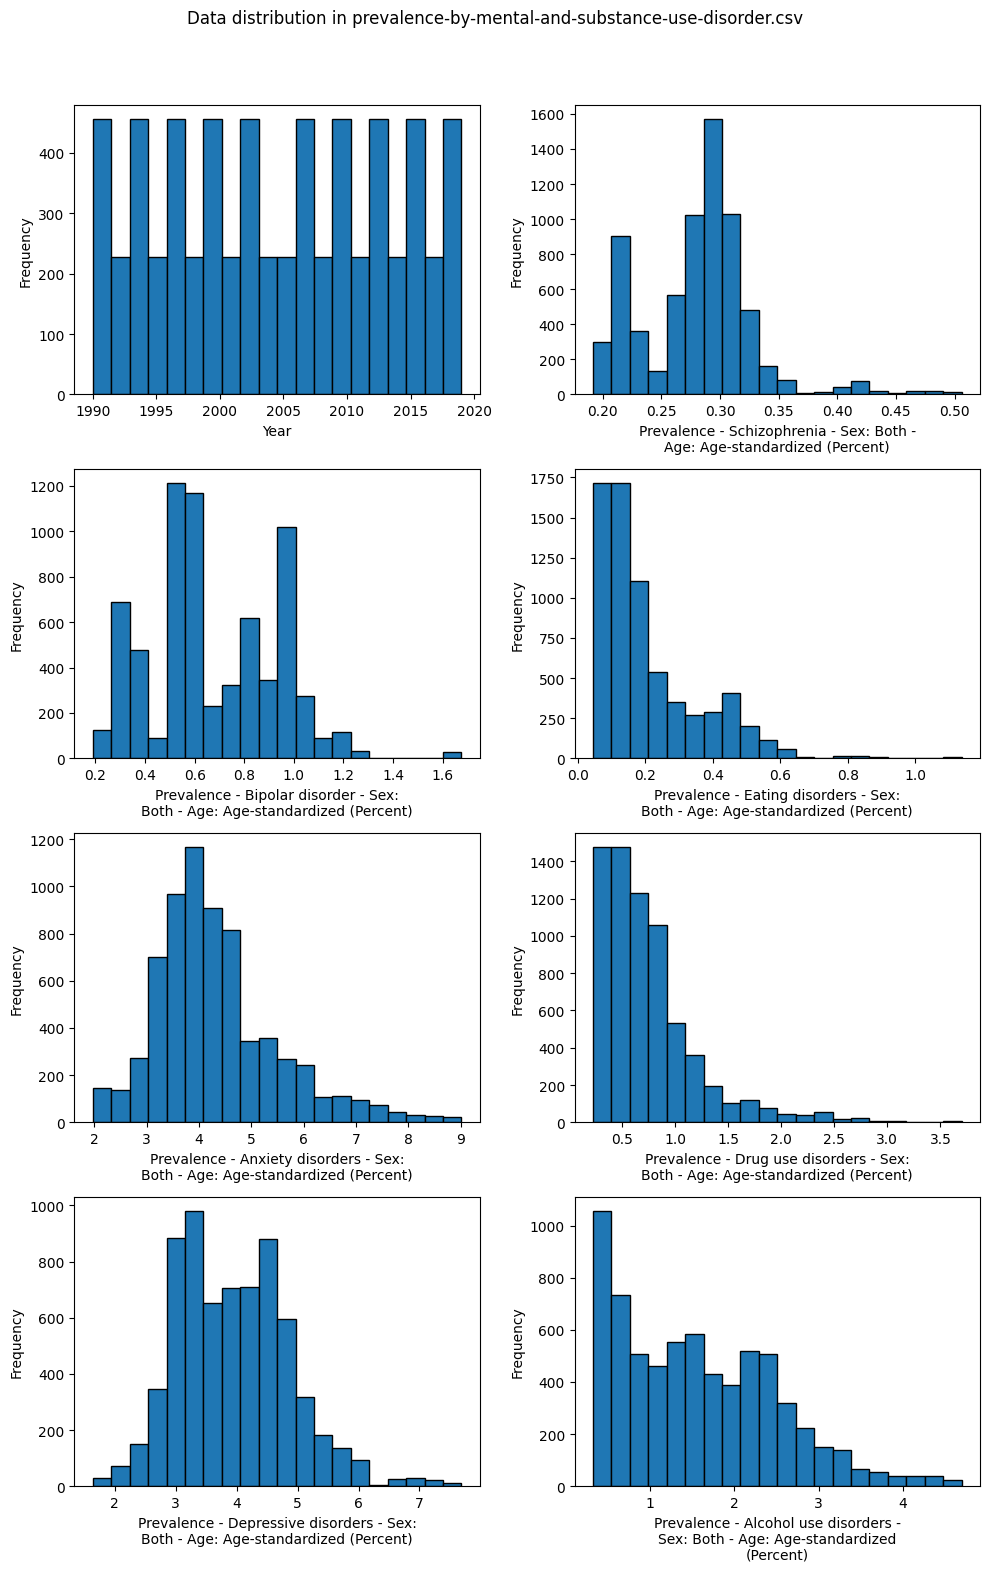

<Figure size 640x480 with 0 Axes>

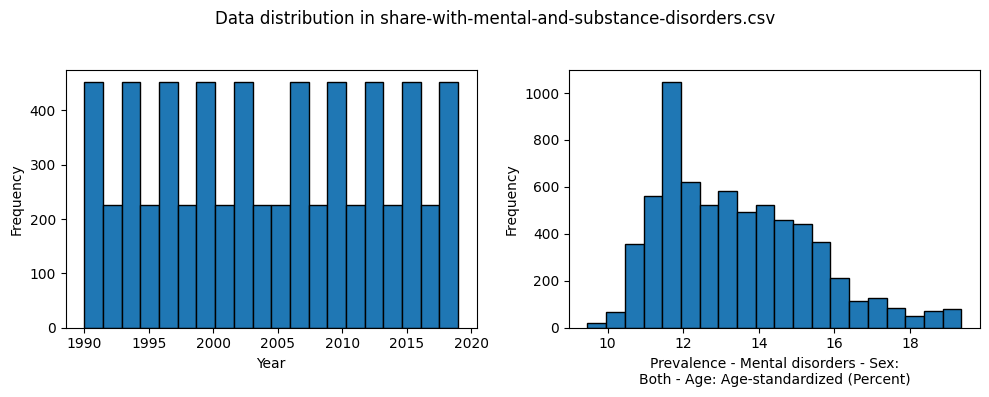

<Figure size 640x480 with 0 Axes>

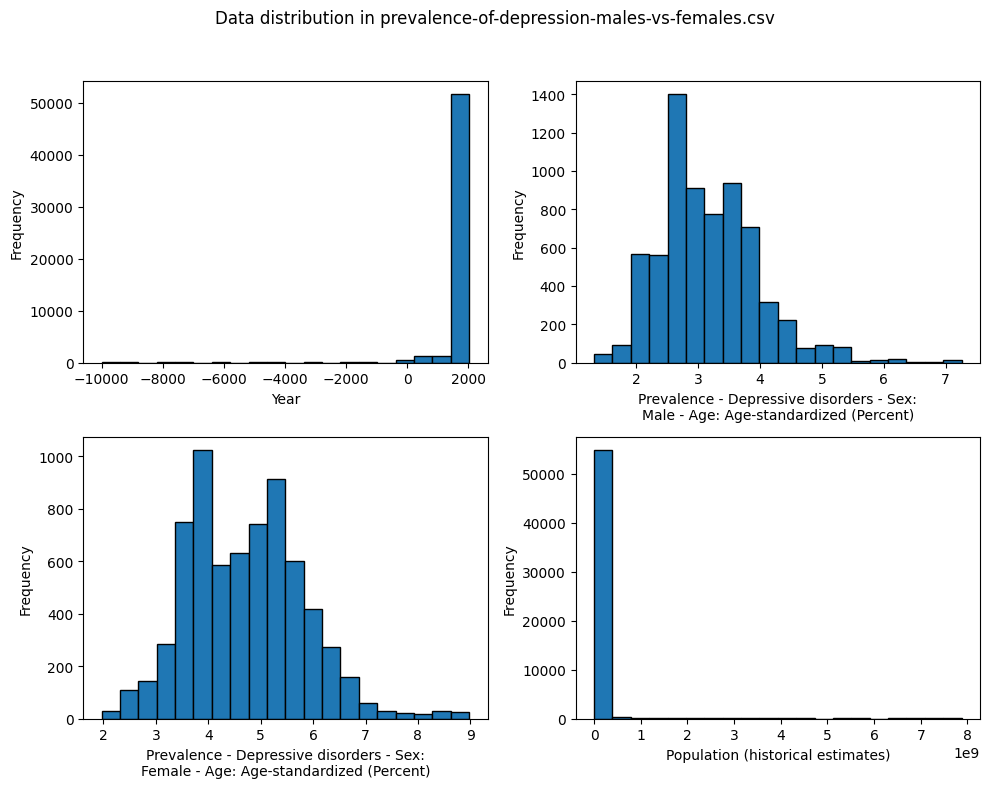

<Figure size 640x480 with 0 Axes>

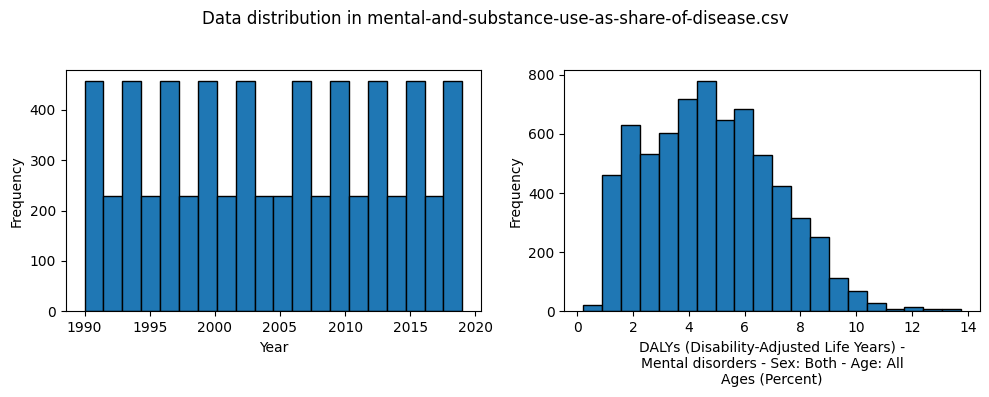

<Figure size 640x480 with 0 Axes>

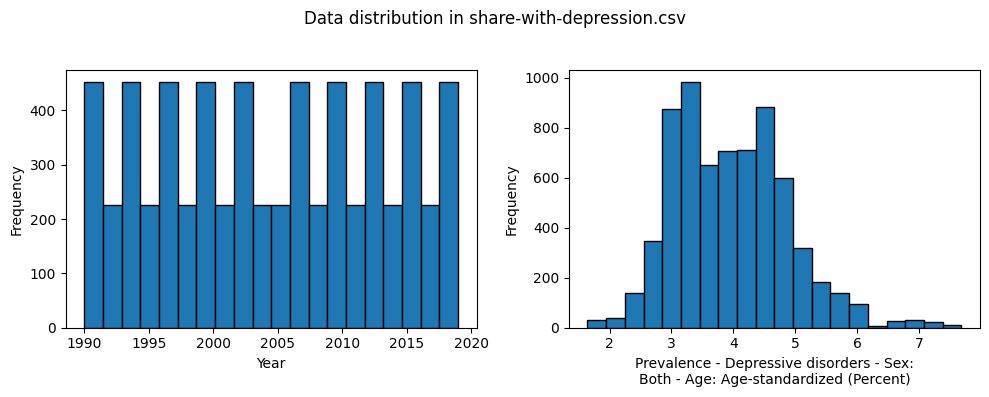

<Figure size 640x480 with 0 Axes>

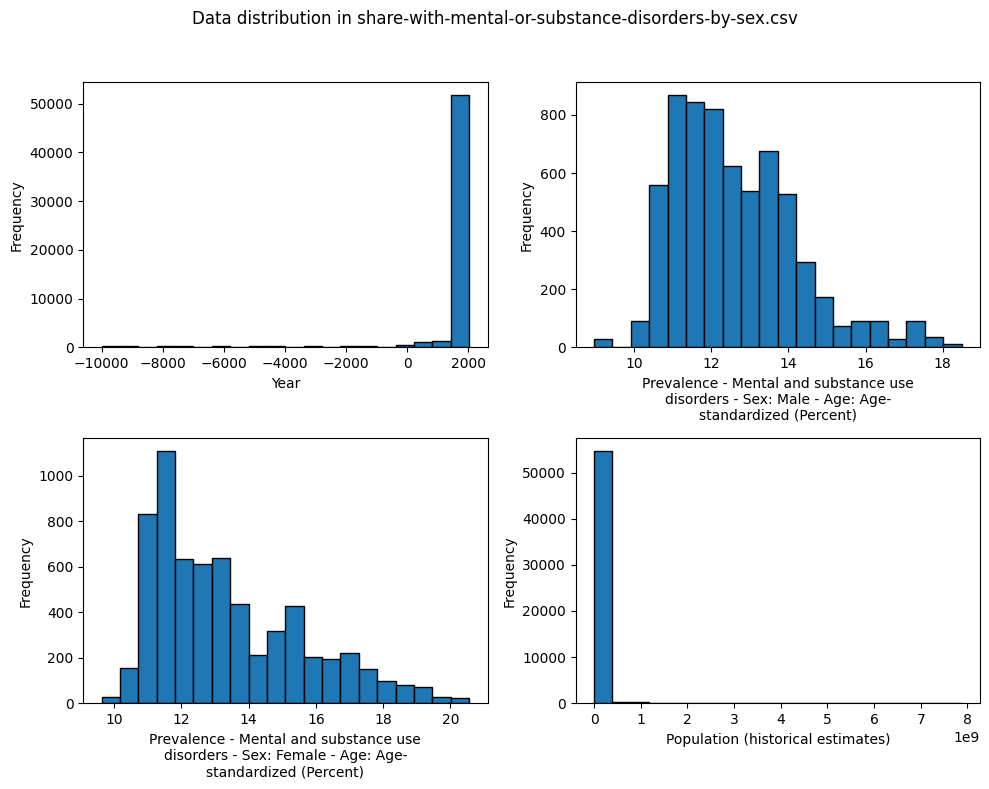

<Figure size 640x480 with 0 Axes>

In [45]:
for file in mh_files:
    df = pd.read_csv(file)  
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if numeric_cols:
        ncols = 2  
        nrows = (len(numeric_cols) + ncols - 1) // ncols 
        fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
        axes = axes.flatten()  
        for i, col in enumerate(numeric_cols):
            axes[i].hist(df[col].dropna(), bins=20, edgecolor='black')
            wrapped_col = textwrap.fill(col, width=40)
            axes[i].set_xlabel(wrapped_col, fontsize=10)
            axes[i].set_ylabel("Frequency", fontsize=10)

        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        fig.suptitle(f"Data distribution in {os.path.basename(file)}", fontsize=12)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
        plt.savefig(f"figures/data_distribution_{os.path.basename(file)}.png")

### Merging the csvs into one df

In [18]:
files = {
    "prevalence_all": "prevalence-by-mental-and-substance-use-disorder.csv",
    "share_mental_sub": "share-with-mental-and-substance-disorders.csv",
    "depression_mf": "prevalence-of-depression-males-vs-females.csv",
    "dalys": "mental-and-substance-use-as-share-of-disease.csv",
    "share_depression": "share-with-depression.csv",
    "share_by_sex": "share-with-mental-or-substance-disorders-by-sex.csv"
}
dfs = {}
for key, filename in files.items():
    path = os.path.join(mh_path, filename)
    df = pd.read_csv(path)
    key_cols = ['Entity', 'Code', 'Year']
    new_columns = {}
    for col in df.columns:
        if col not in key_cols:
            new_columns[col] = f"{key}_{col}"
    df.rename(columns=new_columns, inplace=True)
    dfs[key] = df
merged_df = None
for key, df in dfs.items():
    if merged_df is None:
        merged_df = df
    else:
        merged_df = pd.merge(merged_df, df, on=key_cols, how="outer")

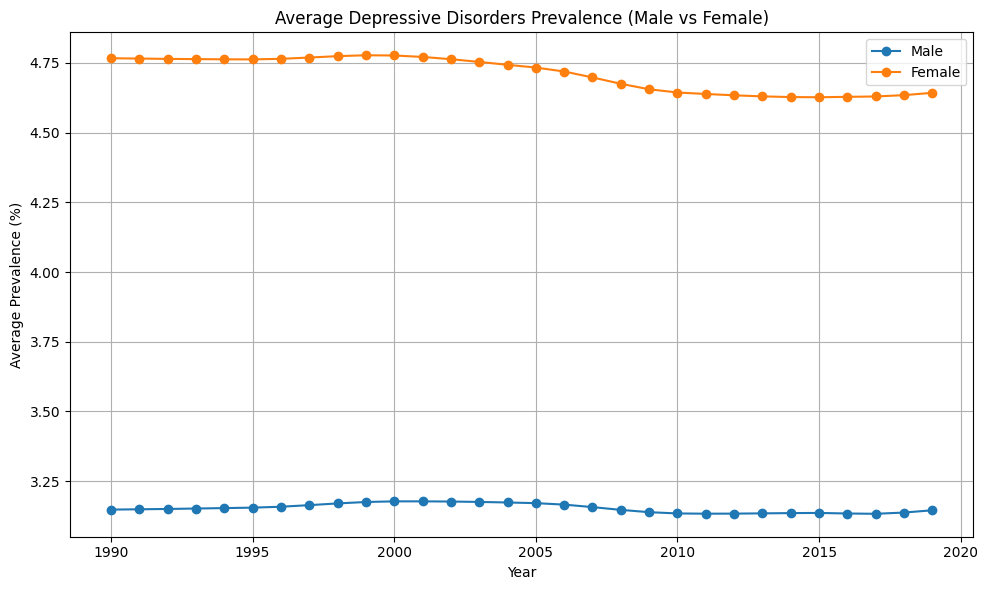

<Figure size 640x480 with 0 Axes>

In [46]:
merged_df["Year"] = pd.to_numeric(merged_df["Year"], errors="coerce")
ts_depression = merged_df.groupby("Year").agg({
    "depression_mf_Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)": "mean",
    "depression_mf_Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)": "mean"
}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(ts_depression["Year"], ts_depression["depression_mf_Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)"],
         marker="o", label="Male")
plt.plot(ts_depression["Year"], ts_depression["depression_mf_Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)"],
         marker="o", label="Female")
plt.xlabel("Year")
plt.ylabel("Average Prevalence (%)")
plt.title("Average Depressive Disorders Prevalence (Male vs Female)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig(f"figures/depression_prevalence_male_female.png")

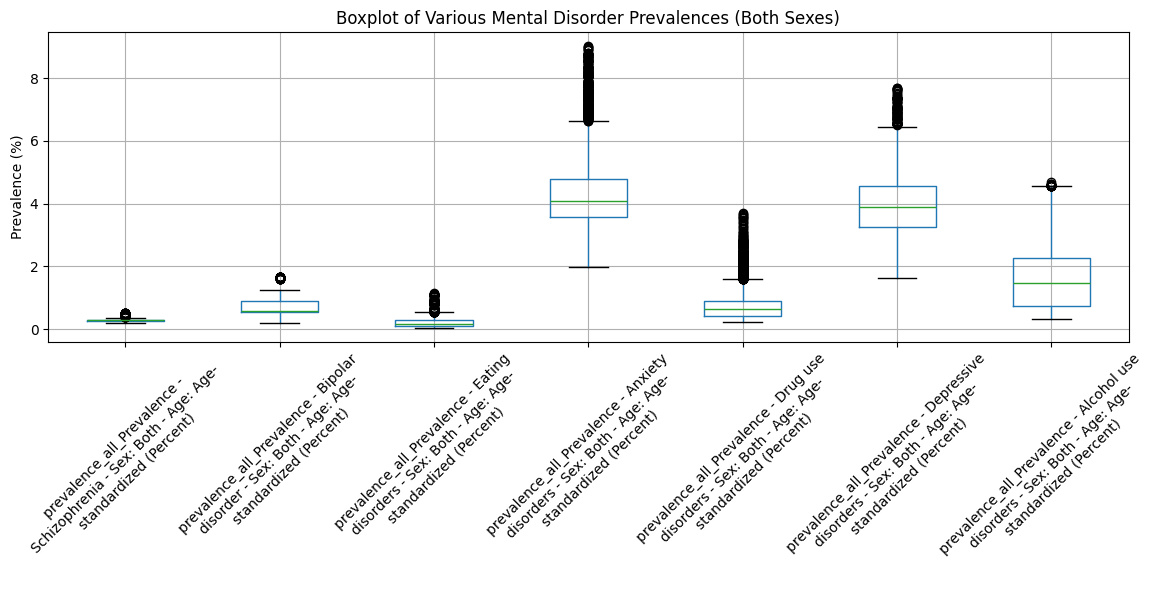

<Figure size 640x480 with 0 Axes>

In [47]:
prevalence_all_cols = [col for col in merged_df.columns if col.startswith("prevalence_all_")]
df_prevalence_all = merged_df[prevalence_all_cols]
wrapped_cols = [textwrap.fill(col, width=40) for col in prevalence_all_cols]
plt.figure(figsize=(12, 6))
ax = df_prevalence_all.boxplot(rot=45)
ax.set_xticklabels(wrapped_cols, rotation=45, fontsize=10)
plt.title("Boxplot of Various Mental Disorder Prevalences (Both Sexes)", fontsize=12)
plt.ylabel("Prevalence (%)", fontsize=10)
plt.tight_layout()
plt.show()
plt.savefig(f"figures/mental_disorder_prevalence_boxplot.png")

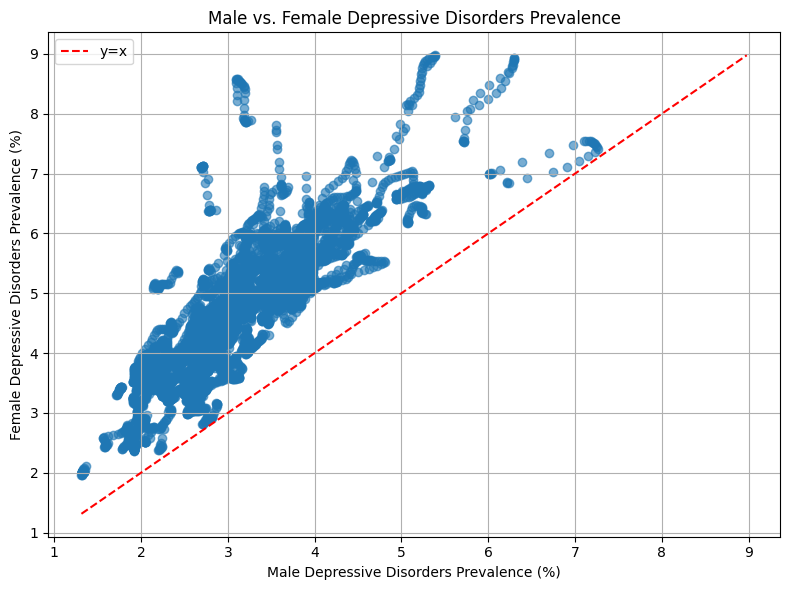

<Figure size 640x480 with 0 Axes>

In [48]:
x = merged_df["depression_mf_Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)"]
y = merged_df["depression_mf_Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)"]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6)

lims = [min(x.min(), y.min()), max(x.max(), y.max())]
plt.plot(lims, lims, 'r--', label="y=x")
plt.xlabel("Male Depressive Disorders Prevalence (%)")
plt.ylabel("Female Depressive Disorders Prevalence (%)")
plt.title("Male vs. Female Depressive Disorders Prevalence")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig(f"figures/male_female_depressive_disorders_prevalence.png")

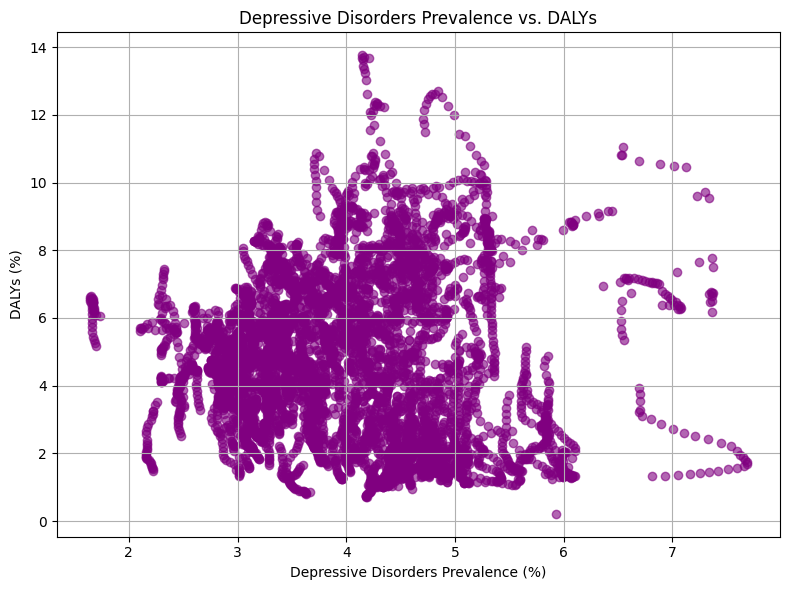

<Figure size 640x480 with 0 Axes>

In [49]:
x2 = merged_df["share_depression_Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)"]
y2 = merged_df["dalys_DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)"]

plt.figure(figsize=(8, 6))
plt.scatter(x2, y2, alpha=0.6, color="purple")
plt.xlabel("Depressive Disorders Prevalence (%)")
plt.ylabel("DALYs (%)")
plt.title("Depressive Disorders Prevalence vs. DALYs")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig(f"figures/depressive_disorders_prevalence_vs_dalys.png")

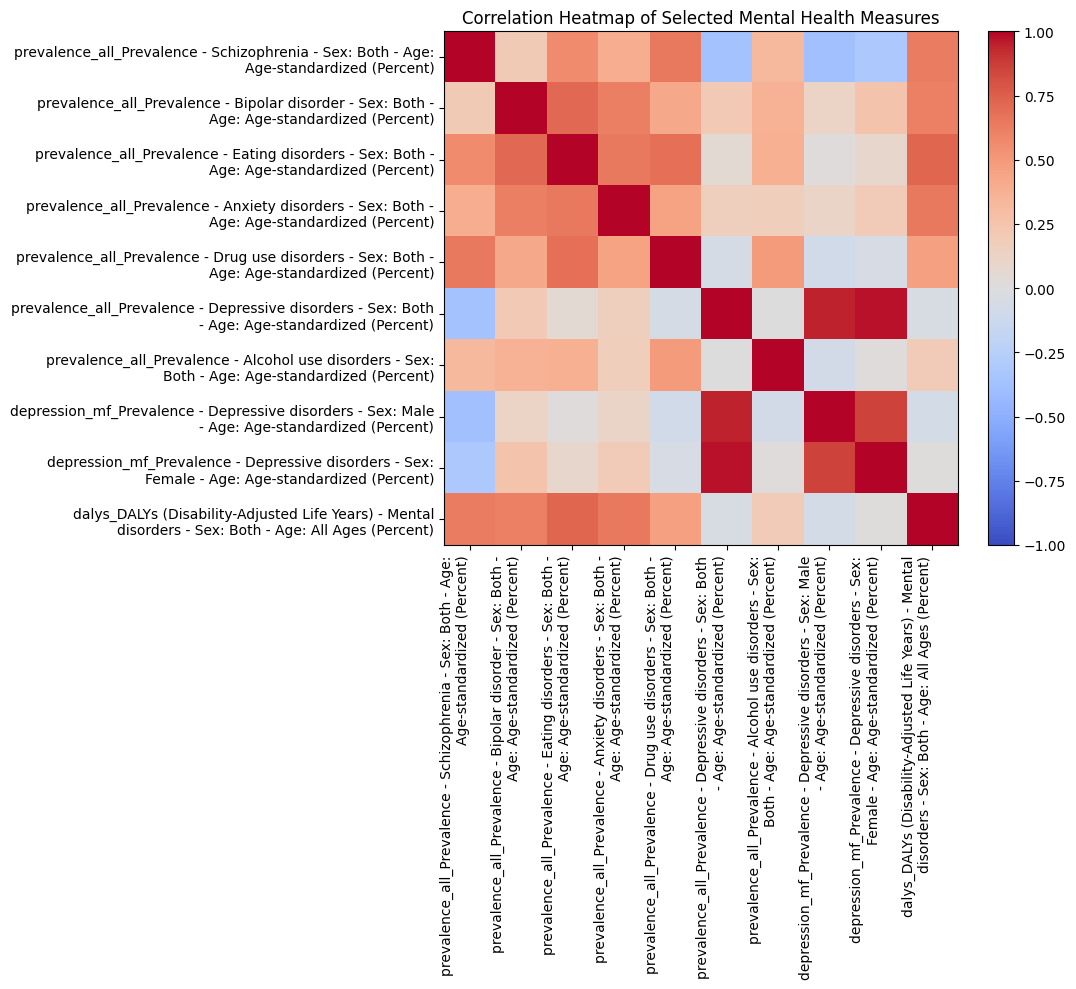

<Figure size 640x480 with 0 Axes>

In [50]:
cols_for_corr = []
cols_for_corr.extend(prevalence_all_cols)
cols_for_corr.append("depression_mf_Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)")
cols_for_corr.append("depression_mf_Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)")
cols_for_corr.append("dalys_DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)")

corr_data = merged_df[cols_for_corr].dropna(how="all")
corr_matrix = corr_data.corr()

plt.figure(figsize=(12, 10))
cax = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(cax, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr_matrix.columns)), [textwrap.fill(col, 60) for col in corr_matrix.columns], rotation=90, ha="right")
plt.yticks(range(len(corr_matrix.index)), [textwrap.fill(col, 60) for col in corr_matrix.index])
plt.title("Correlation Heatmap of Selected Mental Health Measures")
plt.tight_layout()
plt.show()
plt.savefig(f"figures/correlation_heatmap_mh.png")

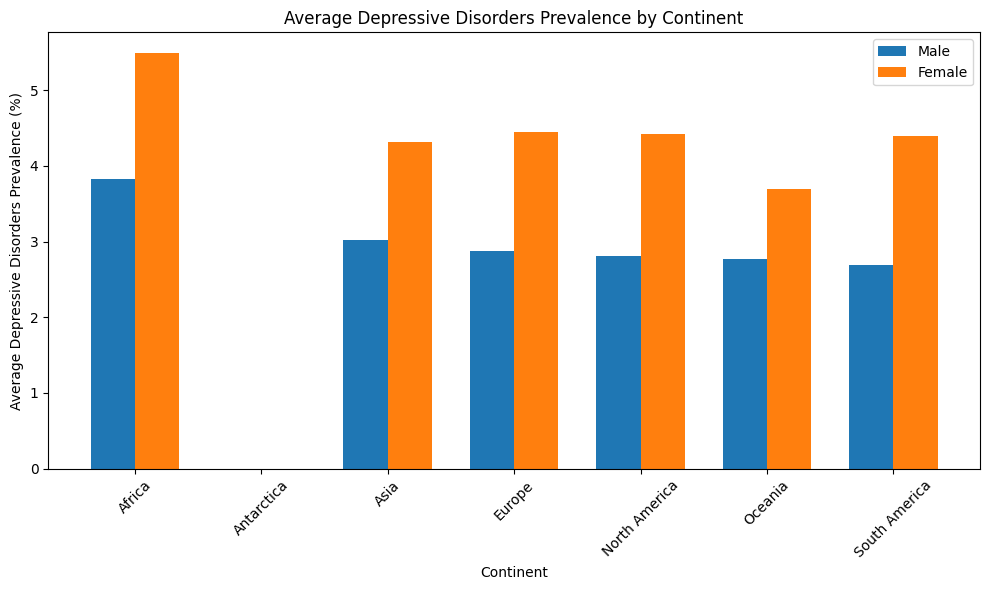

<Figure size 640x480 with 0 Axes>

In [52]:
df_continent = merged_df[merged_df["depression_mf_Continent"].notnull()]
grouped_cont = df_continent.groupby("depression_mf_Continent").agg({
    "depression_mf_Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)": "mean",
    "depression_mf_Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)": "mean"
}).reset_index()

x = np.arange(len(grouped_cont))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, grouped_cont["depression_mf_Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)"],
        width, label="Male")
plt.bar(x + width/2, grouped_cont["depression_mf_Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)"],
        width, label="Female")
plt.xlabel("Continent")
plt.ylabel("Average Depressive Disorders Prevalence (%)")
plt.title("Average Depressive Disorders Prevalence by Continent")
plt.xticks(x, grouped_cont["depression_mf_Continent"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig(f"figures/depressive_disorders_prevalence_by_continent.png")

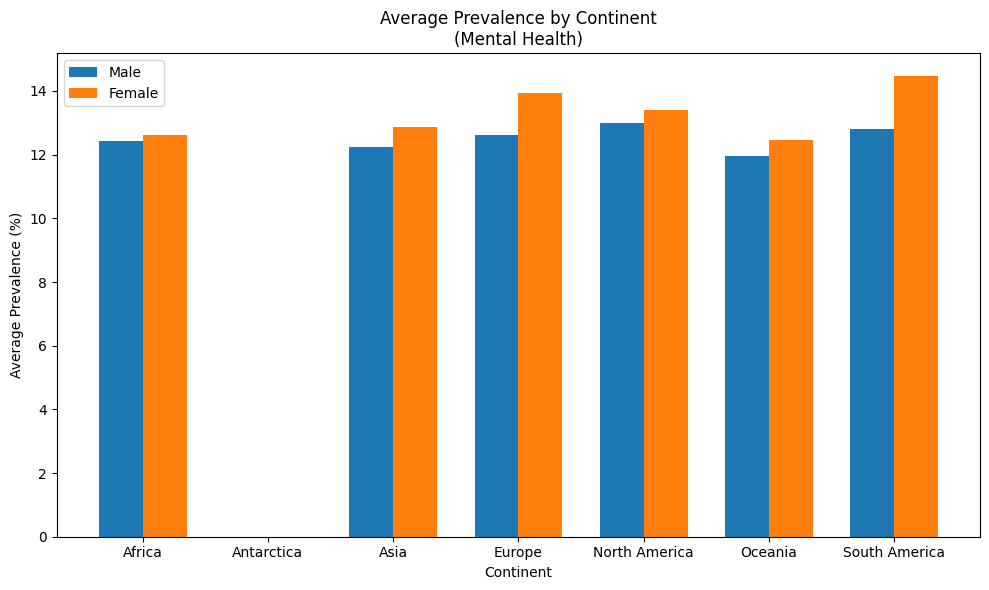

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

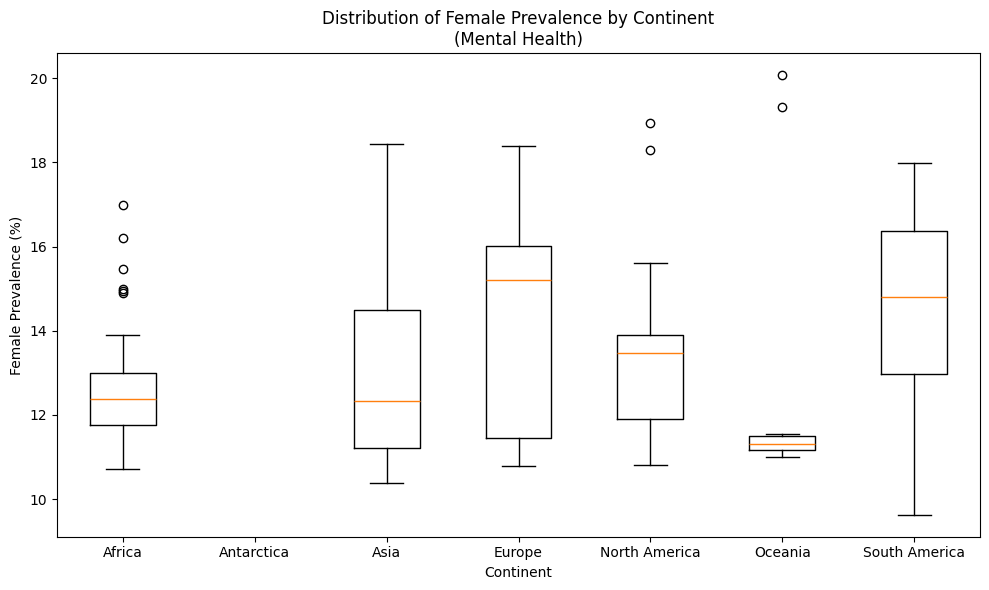

<Figure size 640x480 with 0 Axes>

In [53]:
mh_file = os.path.join(mh_path, "share-with-mental-or-substance-disorders-by-sex.csv")
mh_df = pd.read_csv(mh_file)
mh_continent = mh_df[mh_df["Continent"].notnull()]

grouped_mh = mh_continent.groupby("Continent").agg({
    "Prevalence - Mental and substance use disorders - Sex: Male - Age: Age-standardized (Percent)": "mean",
    "Prevalence - Mental and substance use disorders - Sex: Female - Age: Age-standardized (Percent)": "mean"
}).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
indices = np.arange(len(grouped_mh))
ax.bar(indices, 
       grouped_mh["Prevalence - Mental and substance use disorders - Sex: Male - Age: Age-standardized (Percent)"],
       width=bar_width, label="Male")
ax.bar(indices + bar_width, 
       grouped_mh["Prevalence - Mental and substance use disorders - Sex: Female - Age: Age-standardized (Percent)"],
       width=bar_width, label="Female")
ax.set_xlabel("Continent")
ax.set_ylabel("Average Prevalence (%)")
ax.set_title("Average Prevalence by Continent\n(Mental Health)")
ax.set_xticks(indices + bar_width/2)
ax.set_xticklabels(grouped_mh["Continent"])
ax.legend()
plt.tight_layout()
plt.show()
plt.savefig(f"figures/average_prevalence_by_continent.png")

fig, ax = plt.subplots(figsize=(10, 6))
data_to_plot = [
    mh_continent[mh_continent["Continent"] == cont]["Prevalence - Mental and substance use disorders - Sex: Male - Age: Age-standardized (Percent)"].dropna()
    for cont in grouped_mh["Continent"]
]
ax.boxplot(data_to_plot, labels=grouped_mh["Continent"])
ax.set_xlabel("Continent")
ax.set_ylabel("Male Prevalence (%)")
ax.set_title("Distribution of Male Prevalence by Continent\n(Mental Health)")
plt.tight_layout()
plt.show()
plt.savefig(f"figures/distribution_male_prevalence_by_continent.png")

fig, ax = plt.subplots(figsize=(10, 6))
data_to_plot = [
    mh_continent[mh_continent["Continent"] == cont]["Prevalence - Mental and substance use disorders - Sex: Female - Age: Age-standardized (Percent)"].dropna()
    for cont in grouped_mh["Continent"]
]
ax.boxplot(data_to_plot, labels=grouped_mh["Continent"])
ax.set_xlabel("Continent")
ax.set_ylabel("Female Prevalence (%)")
ax.set_title("Distribution of Female Prevalence by Continent\n(Mental Health)")
plt.tight_layout()
plt.show()
plt.savefig(f"figures/distribution_female_prevalence_by_continent.png")